In [1]:
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:100% !important; }</style>"))

In [2]:
%matplotlib inline

# Quant basics

Bem vindo ao projetinho do Turing Quant!

Neste notebook você aprenderá os seguinte assuntos:

- Importação e visualização de dados financeiros
- Retornos e Risco de um ativo
- Análise de portfólios
- Previsão de Series Temporais

## Referencias

- []()

In [3]:
import pandas as pd
from datetime import datetime as dt
import numpy as np

In [320]:
from matplotlib import pyplot as plt
import matplotlib as mpl
from matplotlib.gridspec import GridSpec
import matplotlib.dates as mdates
import seaborn as sns

In [5]:
plt.style.use('fivethirtyeight')

mpl.rcParams['figure.figsize'] = (40,10)

font = {'weight' : 'bold',
        'size'   : 16}
        
mpl.rc('font', **font)

## 1. Importação de dataset de preço histórico

Para a importação de dados existem diversas bibliotecas em python que fornem preços históricos de ativos

Dentre elas podemos citar as seguinte plataformas:

- Google Finance (Via panda_datareader)
- Yahoo Finace (Via panda_datareader ou yfinance)
- Quandl
- Investing.com (investpy)

Pesquise sobre como importar dados nessas bibliotecas. Os datasets que conseguimos com essas bibliotecas são denominados OHLCV (open-high-low-close-volume).

- 1.1) Plote os preços de fechamento
- 1.2) Faça uma simples análise qualitativa do ativo escolhido (Ex: porque ele teve grande variação em algum momento)

In [6]:
#!pip install investpy

In [7]:
import investpy

In [8]:
df_stock = investpy.get_stock_historical_data(stock='NFLX34', 
                                              country='brazil', 
                                              from_date='01/01/2015', 
                                              to_date='01/08/2021')

In [9]:
df_stock.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 937 entries, 2015-01-13 to 2021-07-30
Data columns (total 6 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Open      937 non-null    float64
 1   High      937 non-null    float64
 2   Low       937 non-null    float64
 3   Close     937 non-null    float64
 4   Volume    937 non-null    int64  
 5   Currency  937 non-null    object 
dtypes: float64(4), int64(1), object(1)
memory usage: 51.2+ KB


In [10]:
df_stock.head(10)

,Open,High,Low,Close,Volume,Currency
Date,,,,,,
2015-01-13,2.44,2.44,2.44,2.44,35000,BRL
2015-01-14,2.40,2.40,2.40,2.40,35000,BRL
2015-01-20,2.55,2.55,2.55,2.55,140000,BRL
2015-01-22,3.08,3.08,3.08,3.08,175000,BRL
2015-01-23,3.23,3.23,3.23,3.23,35000,BRL
2015-02-04,3.53,3.54,3.53,3.54,140000,BRL
2015-02-11,3.75,3.75,3.75,3.75,35000,BRL
2015-02-12,3.67,3.67,3.67,3.67,35000,BRL
2015-03-03,3.94,3.94,3.94,3.94,70000,BRL


In [17]:
dt.strptime('2015-01-13', '%Y-%m-%d')

datetime.datetime(2015, 1, 13, 0, 0)

In [12]:
df_stock.index[0]

Timestamp('2015-01-13 00:00:00')

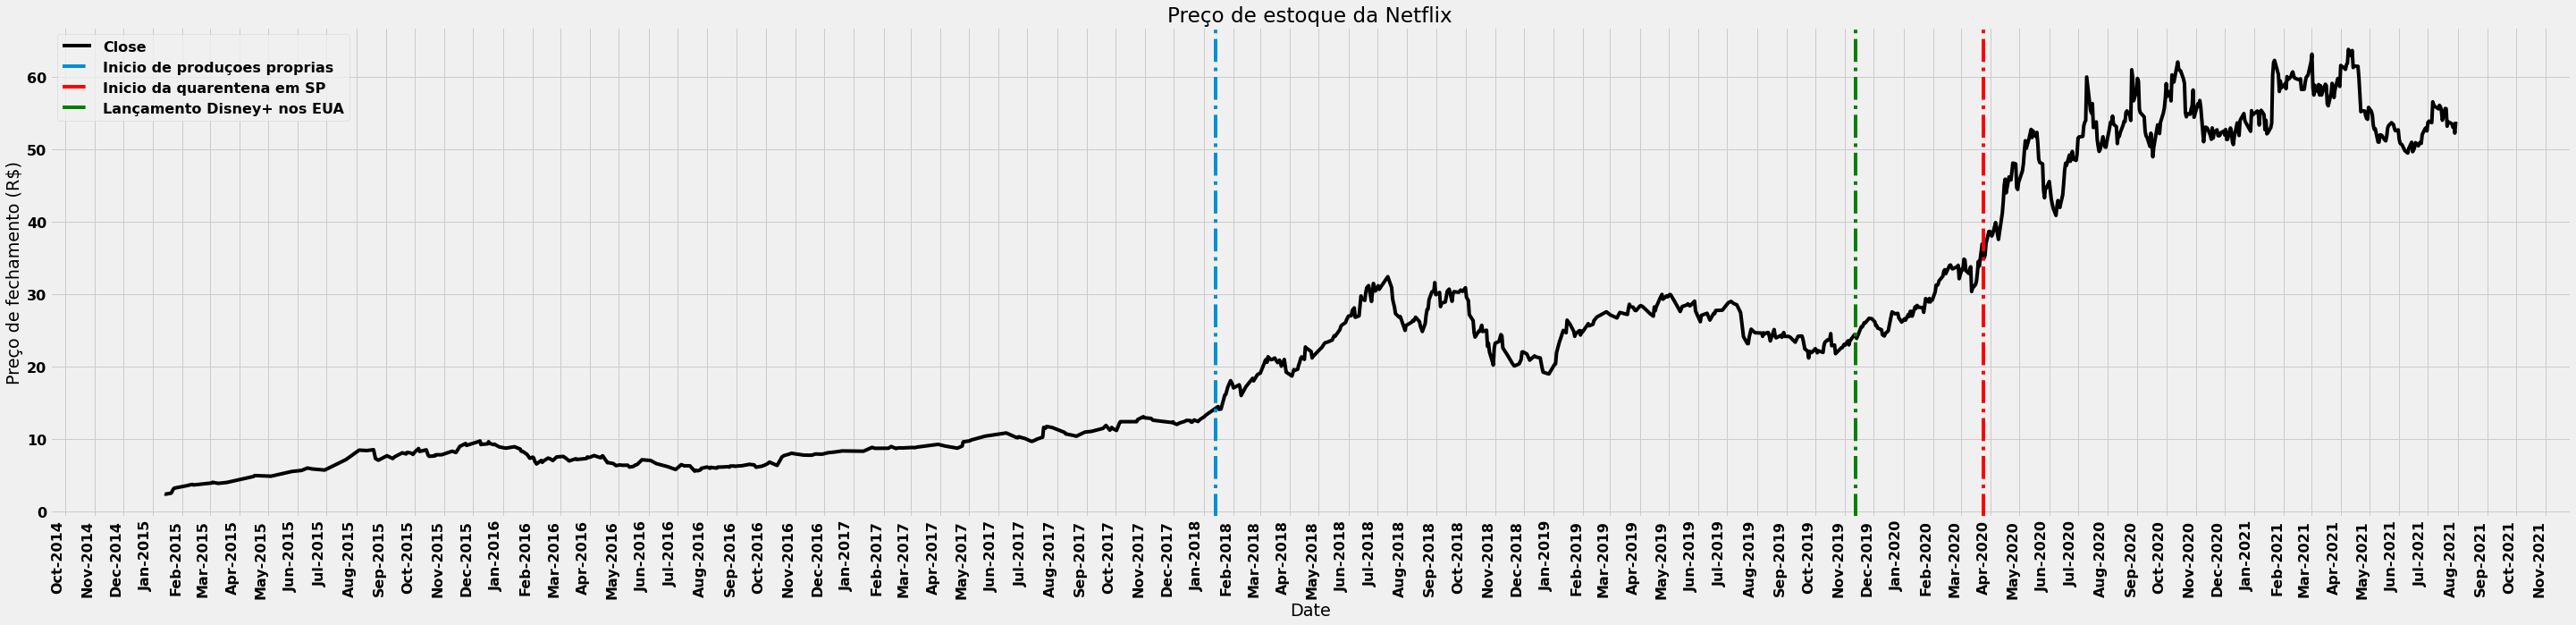

In [33]:
ax = df_stock['Close'].plot(title='Preço de estoque da Netflix', color='black')

# Eventos
ax.axvline(dt.strptime('2018-01-13', '%Y-%m-%d'), 
           label='Inicio de produçoes proprias', 
           linestyle='-.')

ax.axvline(dt.strptime('2020-03-24', '%Y-%m-%d'), 
           label='Inicio da quarentena em SP', 
           linestyle='-.', color='r')

ax.axvline(dt.strptime('2019-11-12', '%Y-%m-%d'), 
           label='Lançamento Disney+ nos EUA', 
           linestyle='-.', color='g')

ax.xaxis.set_major_locator(mpl.dates.MonthLocator())
ax.xaxis.set_major_formatter(mpl.dates.DateFormatter('\n%b-%Y'))
plt.xticks(rotation=90)
plt.tight_layout()

g = ax.legend()
g = ax.set_ylabel('Preço de fechamento (R$)')

## Análise qualitativa

[Uma colocação](https://einvestidor.estadao.com.br/negocios/netflix-como-investir-em-acoes-nflx34/) interesante que eu encontrei e pelo desempenho das acoes faz sentido foi o impacto que o inicio de produçoes proprias tiveram, a Netflix fez um ivestimento bilionario em titulos originais para o catalogo, e o impacto, nao so nas acoes mas no mercado de entretenimento em si,  foi pelo modo como a empresa revolucionou a produçao de series, fazendo frente a grandes estudios. E o mercado reagiu positivamente a isso.

Outro fator legal foi o lançameto do Disney+ nos EUA, sendo um concorrente em preços e catalago (ja que a Disney havia removido suas produçoes da Netflix me 2017), a competitividade entre as duas companias parece ter tido efeito positivo nas açoes. 

Outro fator de destaque nas acoes é o impacto da pandemia, marquei no grafico o inicio da quarentena em SP, mas ate na verdade até antes disso quando outros governos ja entravam em lockdown, as açoes da Netflix parecem ter sido beneficiadas, provavelmente associando que as pessoas com mais tempo em casa usariam mais serviços de streaming. Tem esses artigos bem interessantes que descrevem bem isso:
 - [Ações da Netflix sobem com coronavírus na rua e pessoas em casa da Money Times](https://www.moneytimes.com.br/entenda-por-que-as-acoes-da-netflix-se-destacam-na-atual-turbulencia-de-mercado/)
 - [Ações da Netflix e outras podem se beneficiar do efeito quarentena causado pelo coronavírus da InfoMoney](https://www.infomoney.com.br/negocios/acoes-da-netflix-e-outras-podem-se-beneficiar-do-efeito-quarentena-causado-pelo-coronavirus/)
 - [Here Are the Ways the Pandemic Changed Hollywood da Bloomberg, mais atual](https://www.bloomberg.com/news/features/2021-05-26/pandemic-and-entertainment-how-hollywood-has-been-changed-by-covid)
 
Algumas coisas interssantes que encontrei foi em relacao a alguns picos de acrescimo e decrescimo no finais de trimestre tem um fator de mertas da empresa associados a eles, por exemplo, a queda no fim de 2018 tem um preso da Netflix nao ter alcaçado o numero previsto de assinantes, e ate perdido muitos, assim como no fim de junho de 2021 [artigo da infomoney](https://www.infomoney.com.br/mercados/netflix-decepciona-com-numero-de-novos-clientes-abaixo-do-esperado-expectativa-esta-em-novas-producoes/)

# 2. Retorno e Risco

Essencialmente, a natureza do Mercado Financeiro é baseada em um certo nível de retorno (a variação do seu investimento) para um dado nível de risco (o quão provável é esse retorno). Há uma série de maneiras para mensurar o risco, mas geralmente elas estão ligadas à volatilidade do ativo, que, em sua forma mais simples, é o desvio padrão dos preços em um dado período.

Com o mesmo ativo que você importou anteriormente, iremos iniciar os calculos de risco e retorno. Porém inicialmente iremos analisar retorno e risco com o preço de fechamento.

## Retorno

Existem algumas maneiras de se calcular o retorno de uma série temporal, aqui podemos citar duas:

- 2.1) Retorno Percentual: $R_t = \frac{P_t - P_{t-1}}{P_{t-1}} = \frac{P_t}{P_{t-1}} - 1$
- 2.2) Retorno Logaritmo: $r_t = \ln(\frac{P_t}{P{t-1}}) = \ln(P_t) - \ln(P_{t-1})$

Sendo $P_t$ o preço no tempo t, e $P_{t-1}$ preço no tempo $t-1$ (Dia anterior).

Manipulando o dataframe implemente esse dois tipos de retonos e compare-os. 

Calcule os retornos cumulativos ao longo do tempo:

- 2.3) Retorno Cumulativo Percentual: 

$R_{cum} = \prod_{t=0}^{t = \text{max dias}}{(1 + R_{t})} =  (1+R_{t-\text{max dias}}) * \dots * (1+R_{t-1}) * (1+R_t)$
- 2.4) Retorno Cumulativo Logaritmo: 

$r_{cum} = \sum_{t = 0}^{t = \text{max dias}}{(1 + r_t)} = (1+r_{t-\text{max dias}}) + \dots + (1+r_{t-1}) + (1+r_t)$

In [336]:
# Percentual:
df_stock['retorno_pct'] = df_stock['Close'].pct_change() # https://pandas.pydata.org/docs/reference/api/pandas.Series.pct_change.html
df_stock['retorno_pct_cum'] = (df_stock['retorno_pct'] + 1).cumprod()-1 # https://pandas.pydata.org/docs/reference/api/pandas.Series.cumprod.html#pandas.Series.cumprod

# Logaritmo:
df_stock['retorno_log'] = np.log(df_stock['Close']/df_stock['Close'].shift(1)) # https://pandas.pydata.org/docs/reference/api/pandas.Series.shift.html
df_stock['retorno_log_cum'] = df_stock['retorno_log'].cumsum() #https://pandas.pydata.org/docs/reference/api/pandas.Series.cumsum.html#pandas.Series.cumsum

In [337]:
df_stock.tail(10)

,Open,High,Low,Close,Volume,Currency,retorno_pct,retorno_pct_cum,retorno_log,retorno_log_cum
Date,,,,,,,,,,
2021-07-19,54.06,55.82,54.06,55.65,54710,BRL,0.029983,21.807377,0.029543,3.127084
2021-07-20,56.06,56.10,54.63,55.62,57110,BRL,-0.000539,21.795082,-0.000539,3.126545
2021-07-21,55.44,55.80,52.93,53.20,183187,BRL,-0.043510,20.803279,-0.044484,3.082060
2021-07-22,53.29,53.80,52.67,53.80,31367,BRL,0.011278,21.049180,0.011215,3.093275
2021-07-23,53.00,54.10,52.31,53.75,60815,BRL,-0.000929,21.028689,-0.000930,3.092346
2021-07-26,54.09,54.09,53.20,53.54,36530,BRL,-0.003907,20.942623,-0.003915,3.088431
2021-07-27,53.54,54.06,52.90,53.06,36064,BRL,-0.008965,20.745902,-0.009006,3.079425
2021-07-28,53.79,54.11,53.13,53.37,22644,BRL,0.005842,20.872951,0.005825,3.085251
2021-07-29,53.09,53.10,52.20,52.25,29896,BRL,-0.020986,20.413934,-0.021209,3.064042


In [338]:
# verificar

Text(0, 0.5, 'logaritmo')

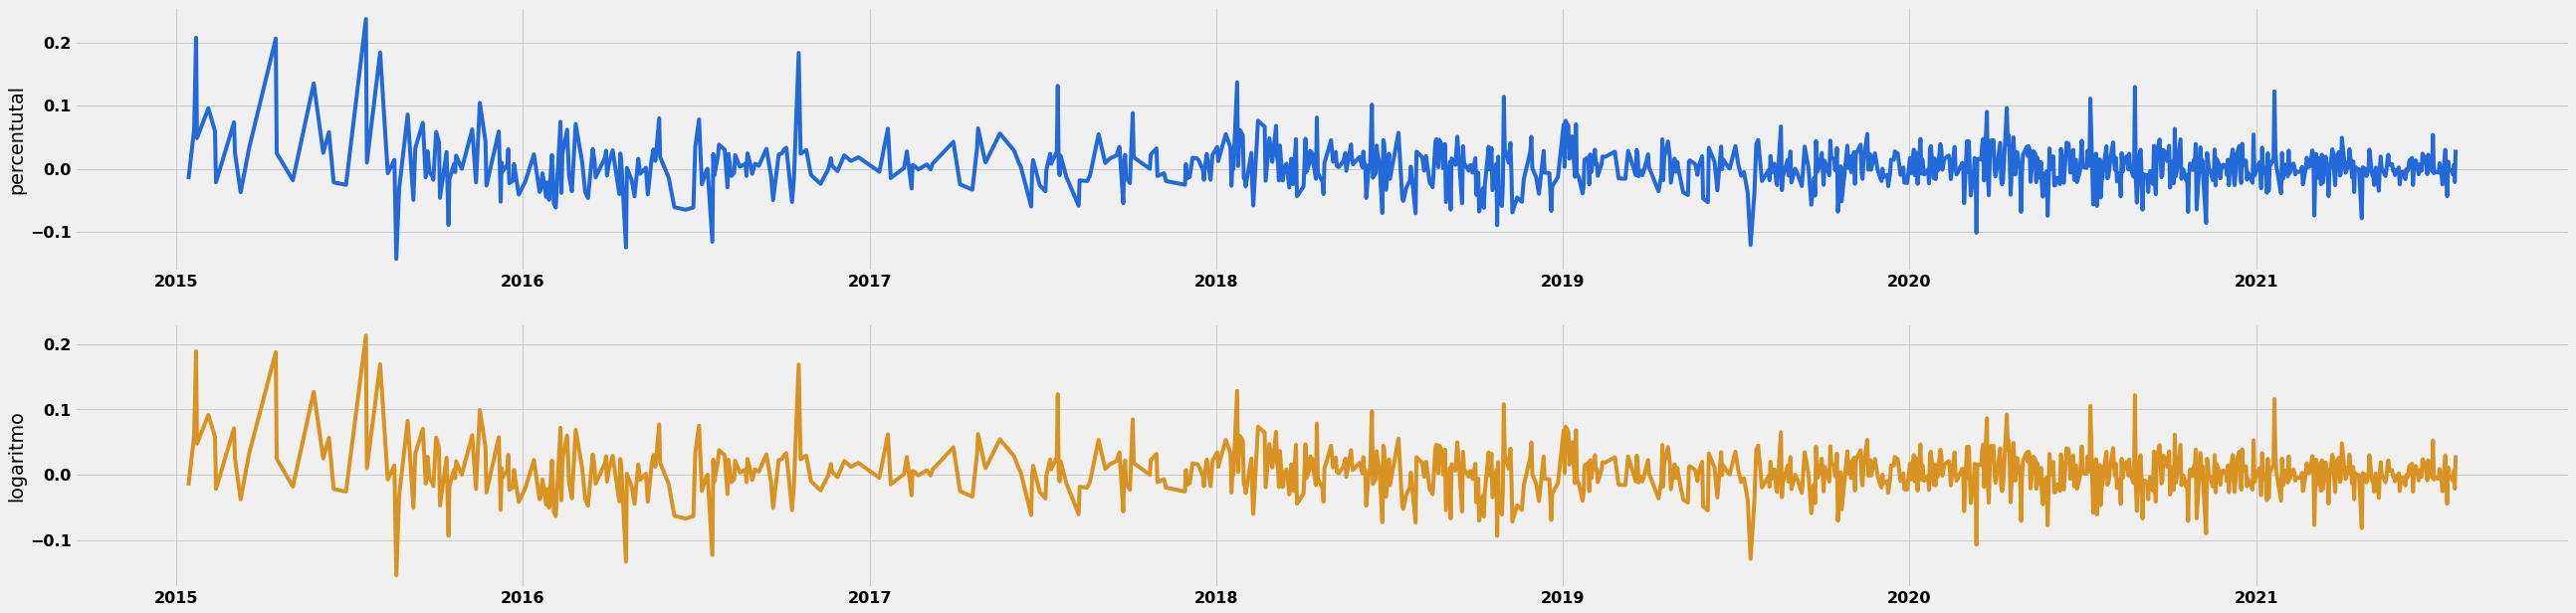

In [339]:
fig, ax = plt.subplots(2)

ax[0].plot(df_stock['retorno_pct'], color='#2369d9')
ax[0].set_ylabel('percentutal')

ax[1].plot(df_stock['retorno_log'], color='#d99323')
ax[1].set_ylabel('logaritmo')

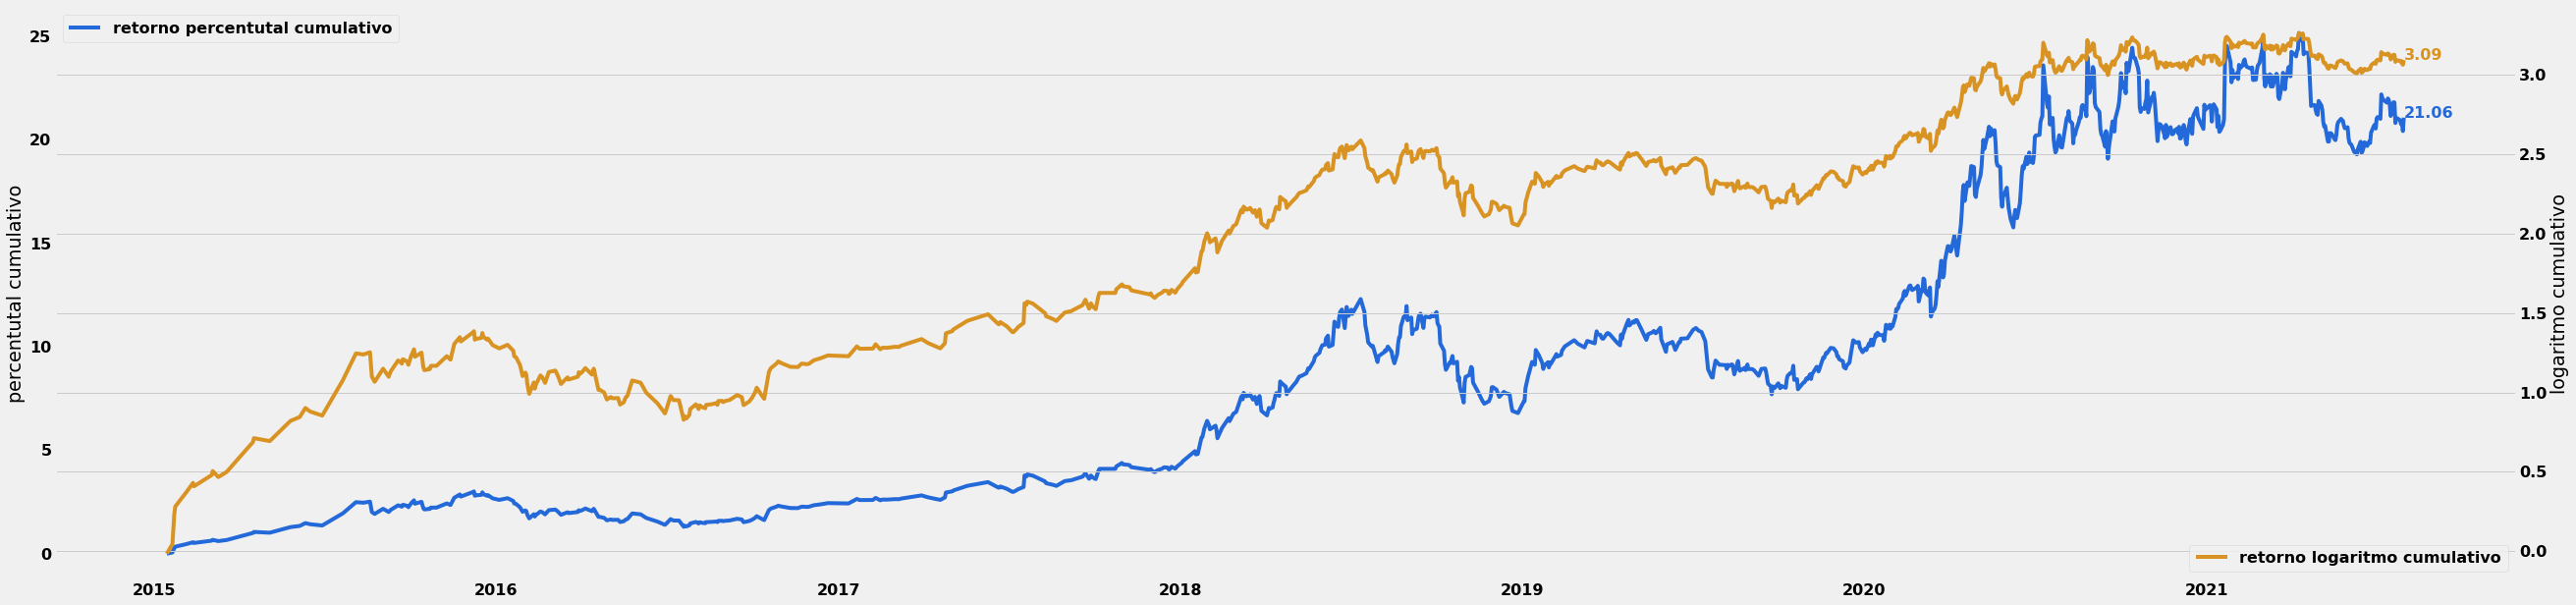

In [340]:
fig, ax = plt.subplots()

ax.plot(df_stock['retorno_pct_cum'], color='#2369d9', label='retorno percentutal cumulativo')
ax.set_ylabel('percentutal cumulativo')
ax.text(x=df_stock.index.max(), 
        y=df_stock['retorno_pct_cum'].iloc[-1], 
        s=round(df_stock['retorno_pct_cum'].iloc[-1], 2),
        color='#2369d9')

ax1 = ax.twinx()
ax1.plot(df_stock['retorno_log_cum'], color='#d99323', label='retorno logaritmo cumulativo')
ax1.set_ylabel('logaritmo cumulativo')
ax1.text(x=df_stock.index.max(), 
         y=df_stock['retorno_log_cum'].iloc[-1], 
         s=round(df_stock['retorno_log_cum'].iloc[-1], 2),
         color='#d99323')

g = ax.legend(loc='upper left')
g = ax1.legend(loc='lower right')
g = ax.grid()
#g = ax1.grid()

Vendo o retorno cumulativo o retorno logaritmo atenua muito picos pontuais do retorno percentual, como faz um funçao log

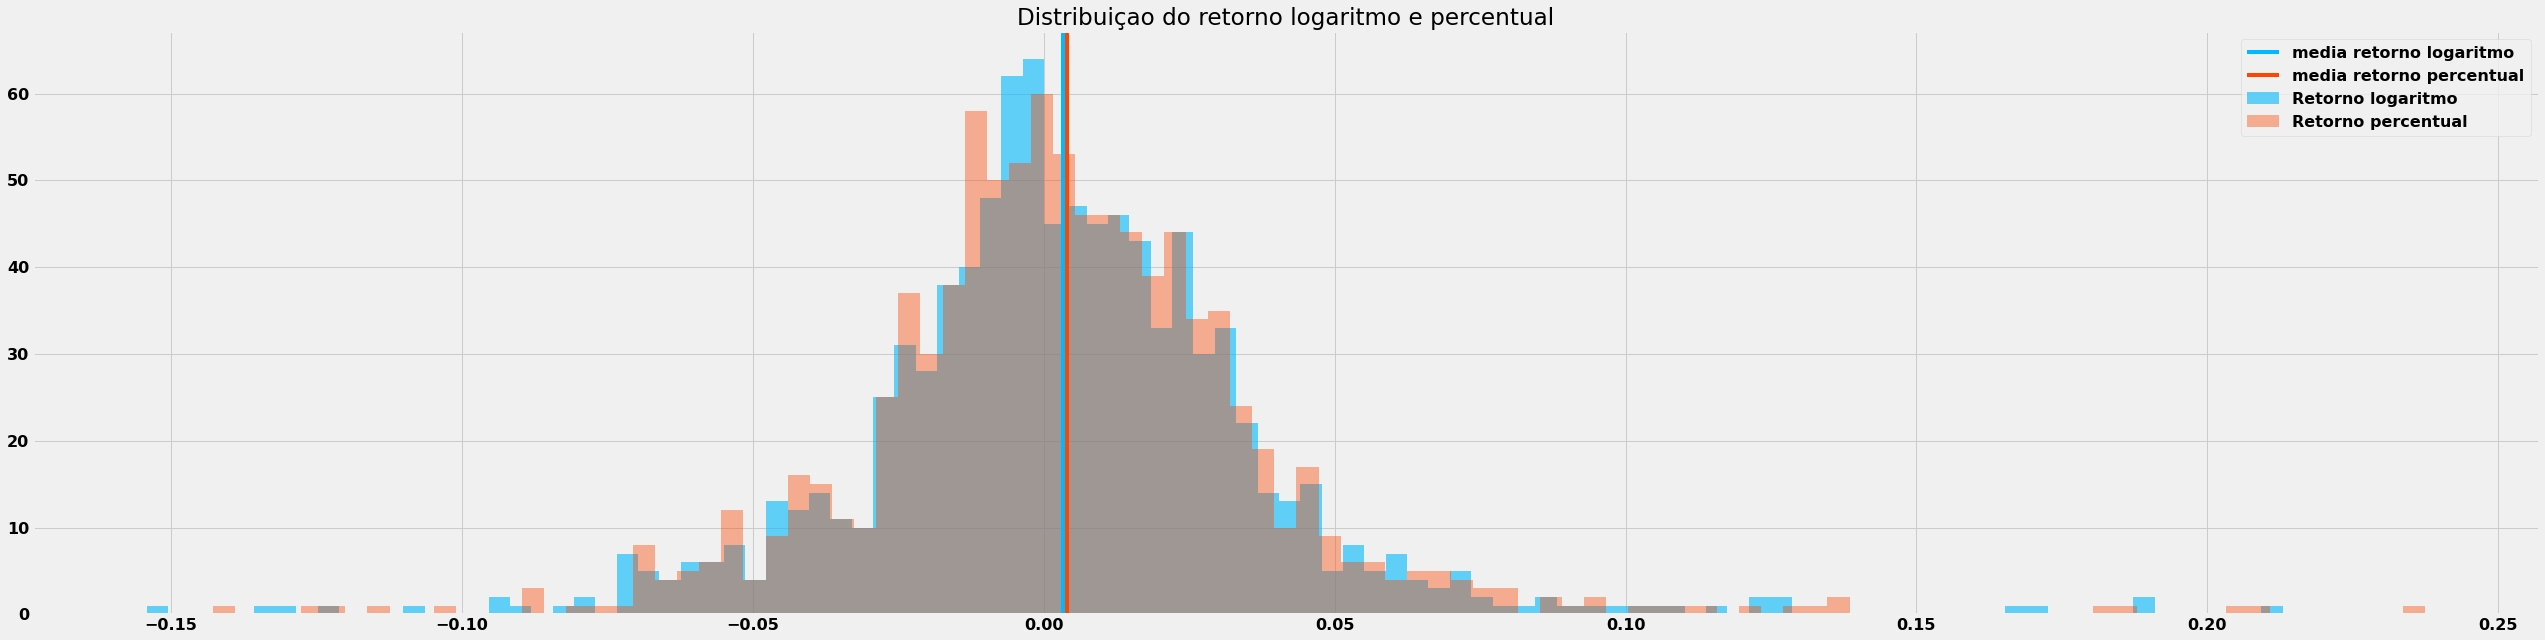

In [341]:
g = df_stock['retorno_log'].hist(bins=100, alpha=.6, label='Retorno logaritmo', color='#00baff')
p = df_stock['retorno_pct'].hist(bins=100, alpha=.4, color='#ff4500', ax=g, label='Retorno percentual')

p = g.axvline(df_stock['retorno_log'].mean(), color='#00baff', label='media retorno logaritmo')
p = g.axvline(df_stock['retorno_pct'].mean(), color='#ff4500', label='media retorno percentual')

p = g.legend()
p = g.set_title('Distribuiçao do retorno logaritmo e percentual')

## Risco

Há diversos tipo de definições de risco, em finança quantitativas uma maneira bem fácil de calcular o risco é a partir da variação do ativo. Basicamente, você não quer investir num ativo que varia muito, ou seja, muito imprevisível. Uma maneira estátistica de cálcular essa volatilidade é a partir do desvio padrão.

- 2.5) Calcule o desvio padrão do ativo

Apenas o valor do desvio padrão não apresenta muita informação, então iremos calcular o rolling std. Básicamente iremos calcular o desvio padrão a cada t intervalo de tempo.

- 2.6) Calcule o rolling std

Dica: utilize o método ```pandas.rolling(window).std()``` do pandas, window é o intervalo em que você irá calcular o desvio padrão

- 2.7) Calcule o desvio padrão exponencial móvel (EWMA)

## Desafio

- 2.8) Calcule o desvio padrão estimado pelo High e Low ([Parkinson Number](https://www.ivolatility.com/help/3.html))
<img src="https://miro.medium.com/proxy/0*t4hSod9UQhA3Lsmz.png">

- 2.9) Calcule o desvio padrão estimado por High, Low, Close e Open ([Garman-Klass](https://portfolioslab.com/garman-klass))

<img src="https://miro.medium.com/max/1400/0*S6HDttTDL2p0GCC2.png">

Temos uma breve explicação desses estimadores de volatilidade em nosso Turing Talks: [Construindo uma Estratégia de Investimentos Quantitativa — Time Series Momentum](https://medium.com/turing-talks/construindo-uma-estrat%C3%A9gia-de-investimentos-quantitativa-time-series-momentum-7e60a40636bd)

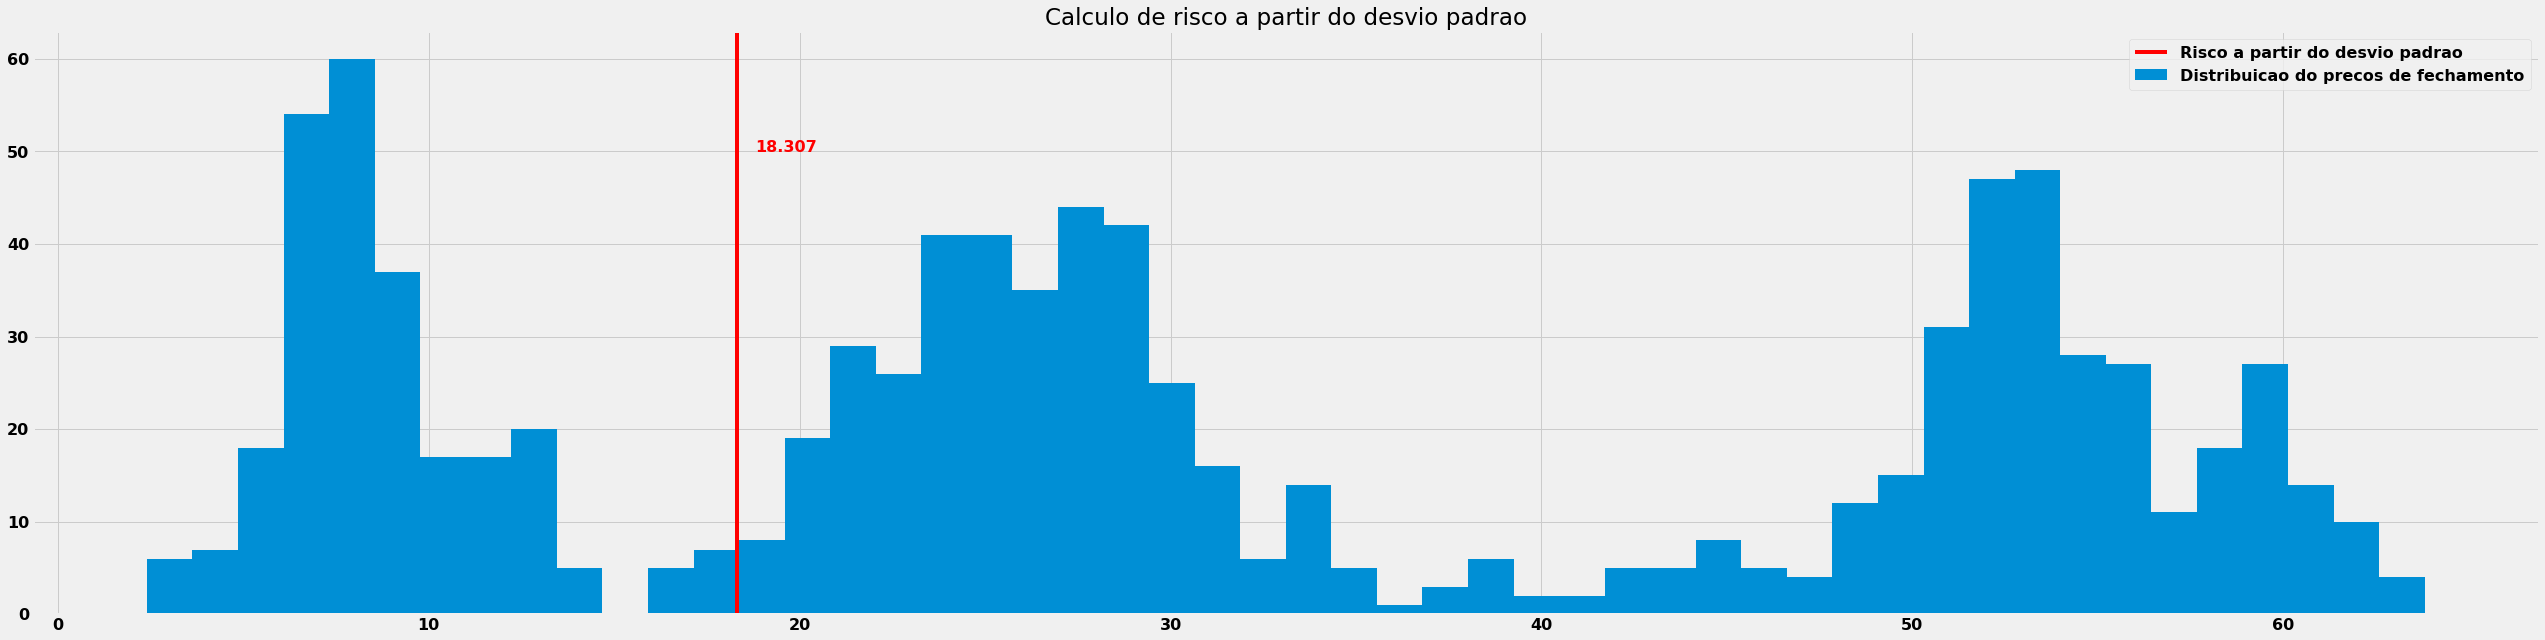

In [21]:
g = df_stock['Close'].hist(bins=50, label='Distribuicao do precos de fechamento')
p = g.axvline(df_stock['Close'].std(), c='r', label='Risco a partir do desvio padrao')
p = g.text(x = df_stock['Close'].std() + .5,
           y = 50,
           s = round(df_stock['Close'].std(), 3),
           color='r')

p = g.legend()
p = g.set_title('Calculo de risco a partir do desvio padrao')

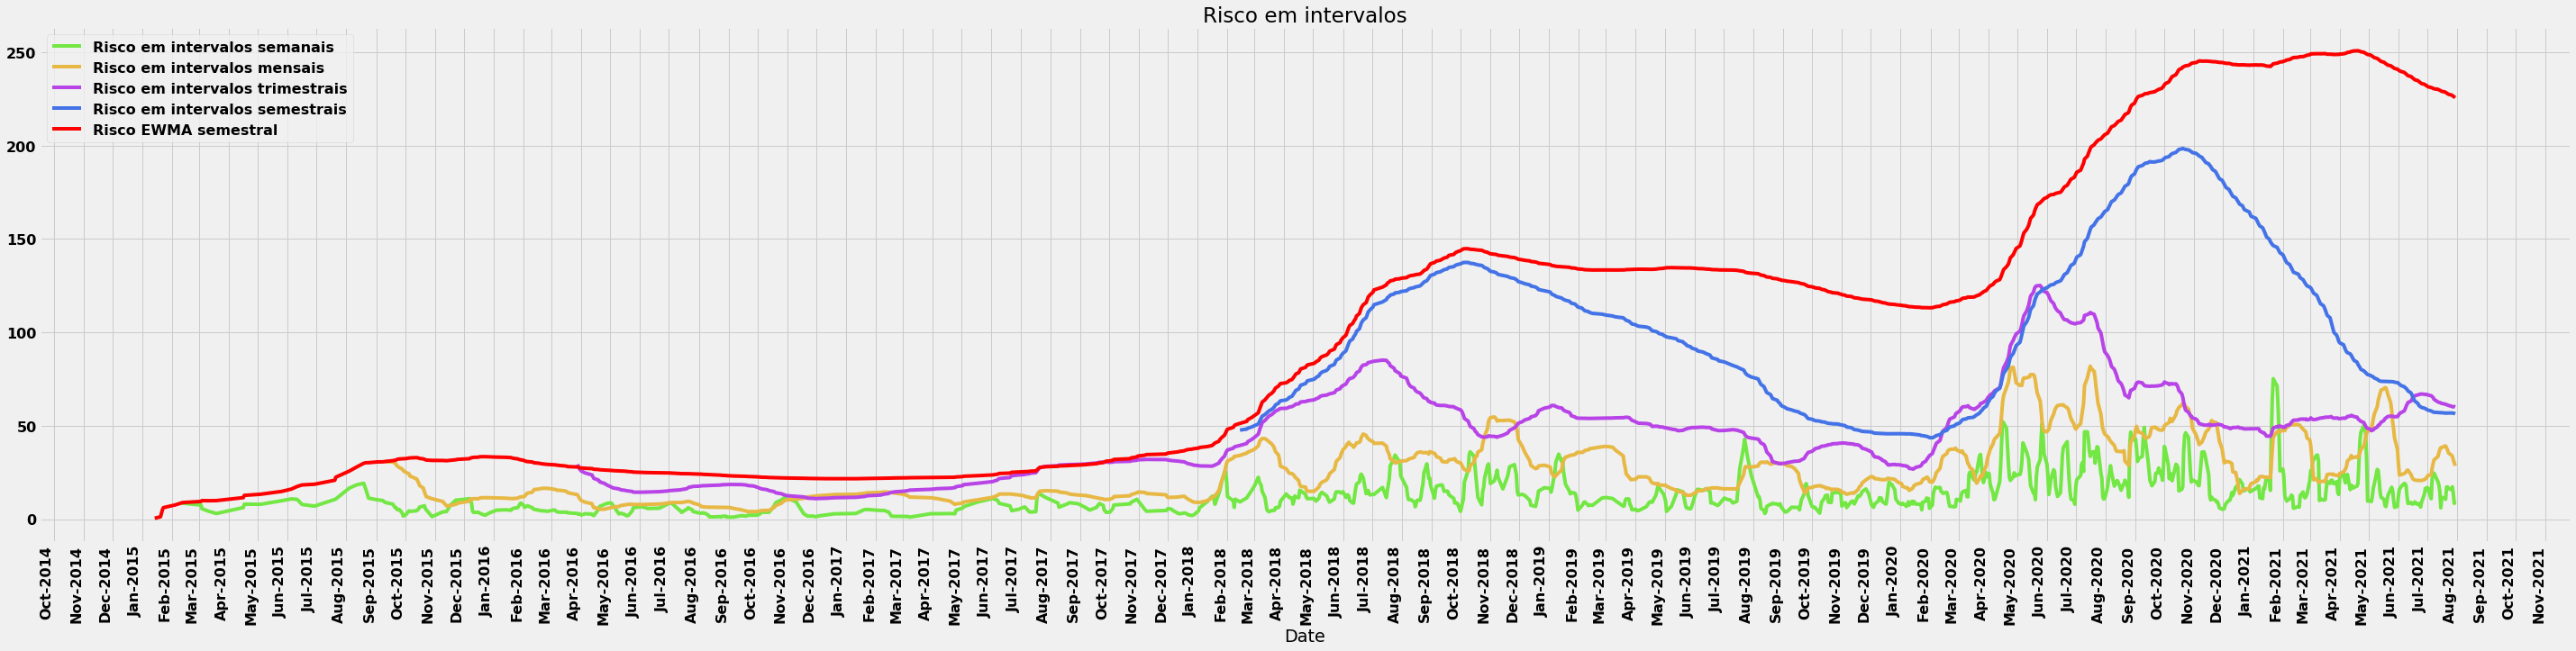

In [128]:
g = (df_stock.rolling(7)['Close'].std()*np.sqrt(252)).plot(label='Risco em intervalos semanais', color='#73e744')
p = (df_stock.rolling(30)['Close'].std()*np.sqrt(252)).plot(ax=g, label='Risco em intervalos mensais', color='#e7b844')
p = (df_stock.rolling(90)['Close'].std()*np.sqrt(252)).plot(ax=g, label='Risco em intervalos trimestrais', color='#b844e7')
p = (df_stock.rolling(252)['Close'].std()*np.sqrt(252)).plot(ax=g, label='Risco em intervalos semestrais', color='#4473e7')

p = (df_stock.ewm(252)['Close'].std()*np.sqrt(252)).plot(ax=g, label='Risco EWMA semestral', color='r')

p = g.xaxis.set_major_locator(mpl.dates.MonthLocator())
p = g.xaxis.set_major_formatter(mpl.dates.DateFormatter('\n%b-%Y'))
p = plt.xticks(rotation=90)
p = plt.tight_layout()

p = g.set_title('Risco em intervalos')
p = g.legend()
#p = g.grid()

In [23]:
def calc_parkinson_num(precos:pd.DataFrame, N:int=1, n:int=1):
    """
    Calculo da volatilidade de um ativo atraves do metodo de Parkinson
    
    @param precos(pd.DataFrame) -> Dataframe com as colunas High e Low
    @param N(int) -> fator de escala dos períodos
    @param n(int) -> tamanho da amostra
    """
    return np.sqrt((np.log(precos['High'] / precos['Low']) ** 2).rolling(n).sum() * (N / (4 * n * np.log(2))))

In [24]:
def calc_gk_num(precos:pd.DataFrame, N:int=1, n:int=1):
    """
    Calculo da volatilidade de um ativo atraves do metodo de Garman-Klass
    
    @param precos(pd.DataFrame) -> Dataframe com as colunas High,Low,Open e Close
    @param N(int) -> fator de escala dos períodos
    @param n(int) -> tamanho da amostra
    """
    return np.sqrt(N/n*(1 / 2 * np.log(df_stock['High'] / df_stock['Low']) ** 2 - (
                    2 * np.log(2) - 1) * np.log(df_stock['Close'] / df_stock['Open'])
                    ** 2).rolling(n).sum())

In [25]:
parkinson = calc_parkinson_num(df_stock[['High', 'Low']], N=1, n=90)

In [26]:
g_klass = calc_gk_num(df_stock[['High', 'Low', 'Open', 'Close']], N=1, n=90)

In [27]:
df_stock['valatilidade_gk'] = g_klass
df_stock['valatilidade_prk'] = parkinson

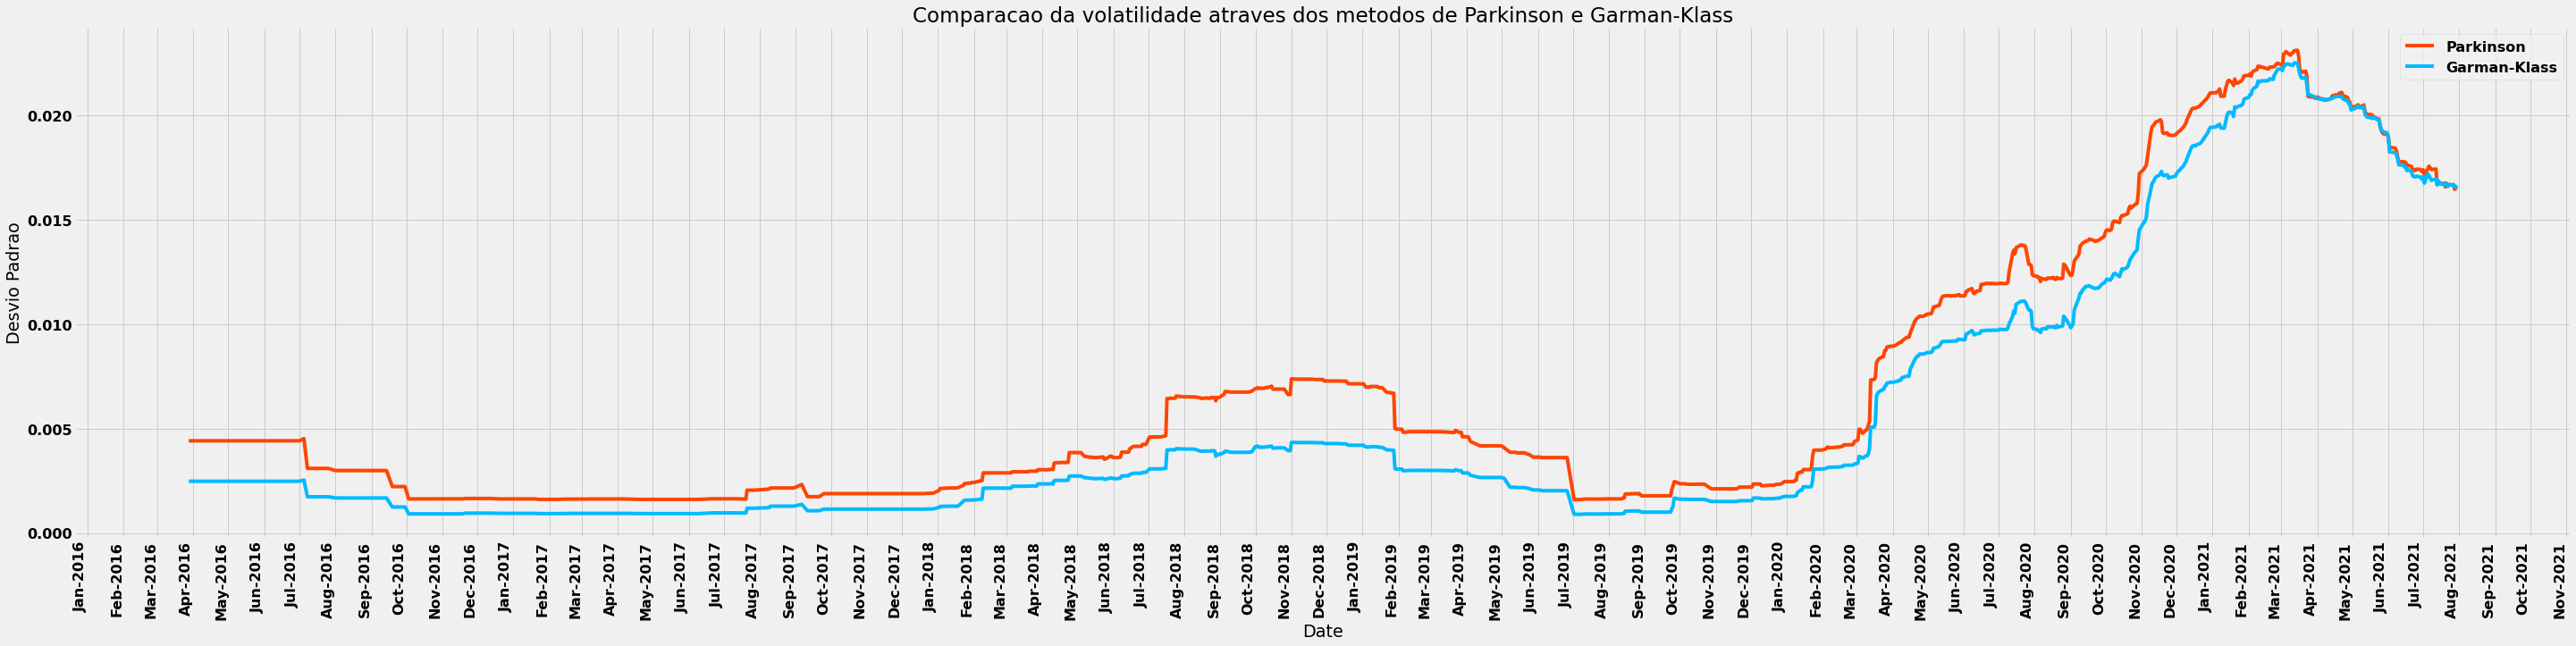

In [28]:
g = parkinson.plot(color='#ff4500', label='Parkinson')
p = g_klass.plot(ax=g, color='#00baff', label='Garman-Klass')

g.xaxis.set_major_locator(mpl.dates.MonthLocator())
g.xaxis.set_major_formatter(mpl.dates.DateFormatter('\n%b-%Y'))
plt.xticks(rotation=90)
plt.tight_layout()

p = g.legend()
p = g.set_ylabel('Desvio Padrao')
P = g.set_title('Comparacao da volatilidade atraves dos metodos de Parkinson e Garman-Klass')
#p = g.grid()

# 3. Lidando com portfolios
 
[Notebook de auxilio](https://github.com/quantopian/research_public/blob/master/notebooks/lectures/Introduction_to_NumPy/notebook.ipynb)

Agora que você já aprendeu como importar preços históricos e como calcular o risco e retorno de ativos, podemos usar esse conhecimento para começar a montar o nosso portfolio!

Nessa etapa, você irá montar uma carteira com 4 ações diferentes. 
 - Use o que você aprendeu nas etapas anteriores para construir um dataframe com 4 ativos diferentes junto com os seus respectivos **dados históricos de fechamento**.
 
Em seguida, você precisa distribuir a porcentagem que cada ativo da sua carteira receberá dos seus investimentos. Em finanças, chamamos isso de [pesos de um portfolio](https://www.investopedia.com/terms/p/portfolio-weight.asp)
 - Atribua pesos ($w$) para cada um dos ativos que estão na sua carteira (Ele devem somar 1) . Ex: w = [0.3, 0.3, 0.2, 0.2]

## Retorno

Agora, você pode calcular o **retorno** do seu portfolio. 

O retorno para um período é dado pela seguinte fórmula: $R = \vec{r} \times \vec{w}$

Onde $\vec{r}$ é o vetor de retornos de cada ativo da carteira, e $\vec{w}$ os seus respectivos pesos.

- 3.1) Calcule o **retorno** para cada dia da série temporal

- 3.2) Faça um gráfico para visualizar os **retornos cumulativos** do seu portfolio e compare com algum benchmark (EX: IBOV). 

In [29]:
#investpy.get_stocks_dict(country='brazil')

In [51]:
atvs = ['NFLX34', 'EMBR3', 'MGLU3', 'ITUB4']

# lista de pesos aleatorios
pesos = np.random.uniform(0, 1, len(atvs))

# normaliza para soma dar 1
soma = pesos.sum()
pesos = [p / soma for p in pesos]

In [52]:
atv_peso = dict(zip(atvs, pesos))
atv_peso

{'NFLX34': 0.3076869116096527,
 'EMBR3': 0.0169207445868101,
 'MGLU3': 0.2068423531292043,
 'ITUB4': 0.4685499906743328}

In [53]:
df_portfolio = pd.DataFrame()

for atv in atvs:
    df_portfolio[atv] = investpy.get_stock_historical_data(stock=atv,
                                                           country='brazil',
                                                           from_date='01/01/2018',
                                                           to_date='01/08/2021')['Close']

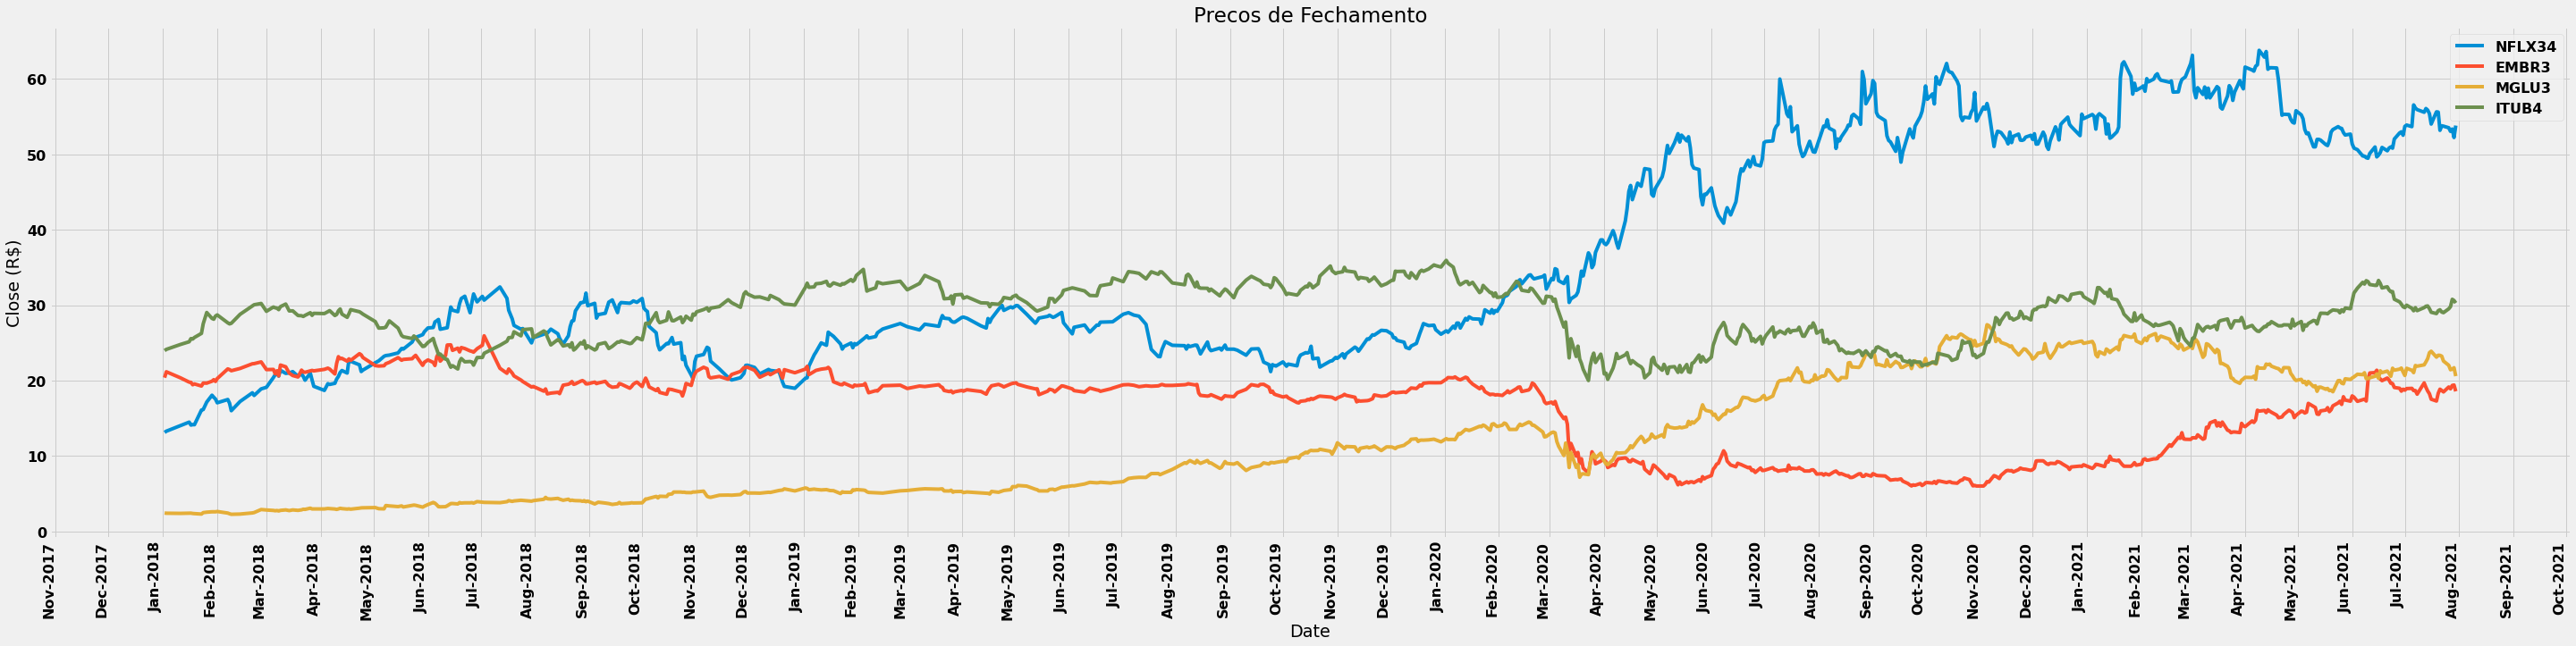

In [54]:
g = df_portfolio[atvs].plot(subplots=False)

g.xaxis.set_major_locator(mpl.dates.MonthLocator())
g.xaxis.set_major_formatter(mpl.dates.DateFormatter('\n%b-%Y'))
plt.xticks(rotation=90)
plt.tight_layout()

p = g.set_title('Precos de Fechamento')
p = g.set_ylabel('Close (R$)')
#p = g.grid()

Bem interessante, confirmando a analise anteriorm, as açoes da Netflix foram muito beneficiadas pela pandemia, enquanto Magazine Luiza (MGLU3 - setor de varejo), Itau (ITUB4 - banco) e Embarer (EMBR3 - aviaçao) tiveram queda as acoes da Netflix subiram.

Vou verificar a correlacao entre eles, talvez tenham algum direto fator em comum 

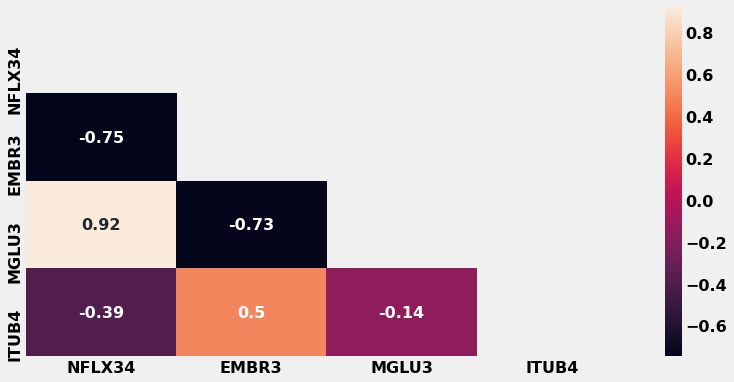

In [332]:
plt.figure(figsize=(12,6))
mask = np.triu(np.ones_like(df_portfolio[atvs].corr(), dtype=np.bool))
g = sns.heatmap(df_portfolio[atvs].corr(), annot=True, mask=mask)

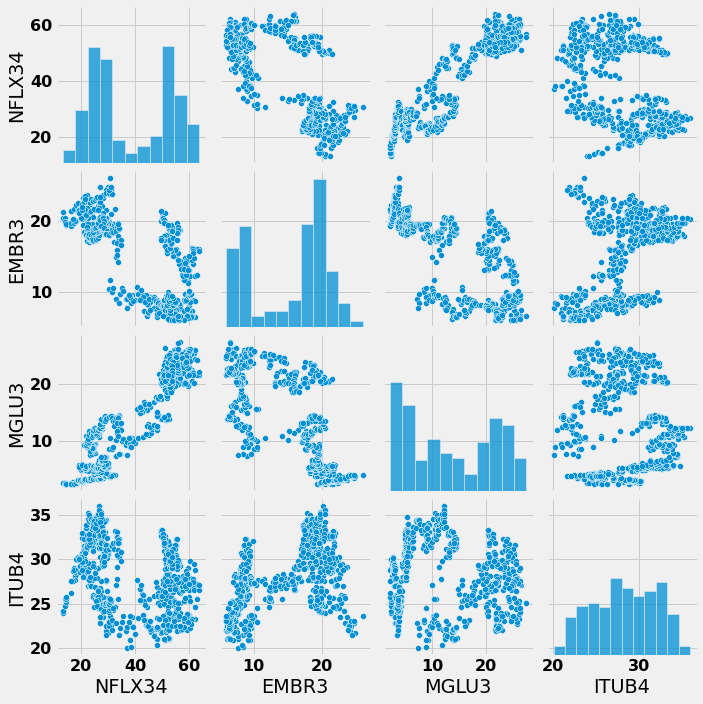

In [335]:
g = sns.pairplot(df_portfolio[atvs])

Nao parece haver nenhuma correlacao entre os ativos

In [55]:
retorno = np.dot(df_portfolio[atvs].pct_change(), pesos)
df_portfolio['retorno_simples'] = retorno
df_portfolio['retorno_simples_cum'] = (df_portfolio['retorno_simples'] + 1).cumprod() -1

In [56]:
df_portfolio.tail(10)

,NFLX34,EMBR3,MGLU3,ITUB4,retorno_simples,retorno_simples_cum
Date,,,,,,
2021-07-19,55.65,17.30,23.12,28.90,-0.000497,2.226315
2021-07-20,55.62,18.32,23.37,29.28,0.009229,2.256091
2021-07-21,53.20,18.87,23.36,29.40,-0.011048,2.220119
2021-07-22,53.80,18.70,23.25,29.10,-0.002437,2.212271
2021-07-23,53.75,18.51,22.60,29.02,-0.007529,2.188086
2021-07-26,53.54,19.16,22.04,29.53,0.002501,2.196060
2021-07-27,53.06,18.92,21.45,29.82,-0.003906,2.183576
2021-07-28,53.37,19.37,21.53,30.79,0.018213,2.241558
2021-07-29,52.25,19.42,21.72,30.63,-0.007023,2.218793


In [57]:
benchmark = investpy.indices.get_index_historical_data(index='Bovespa', 
                                                       country='brazil', 
                                                       from_date='01/01/2018', 
                                                       to_date='01/08/2021')['Close']

benchmark = benchmark.pct_change()
benchmark = (benchmark + 1).cumprod() -1
benchmark.tail(10)

Date
2021-07-19    0.597039
2021-07-20    0.609955
2021-07-21    0.616734
2021-07-22    0.619532
2021-07-23    0.605487
2021-07-26    0.617697
2021-07-27    0.599825
2021-07-28    0.621317
2021-07-29    0.613473
2021-07-30    0.563737
Name: Close, dtype: float64

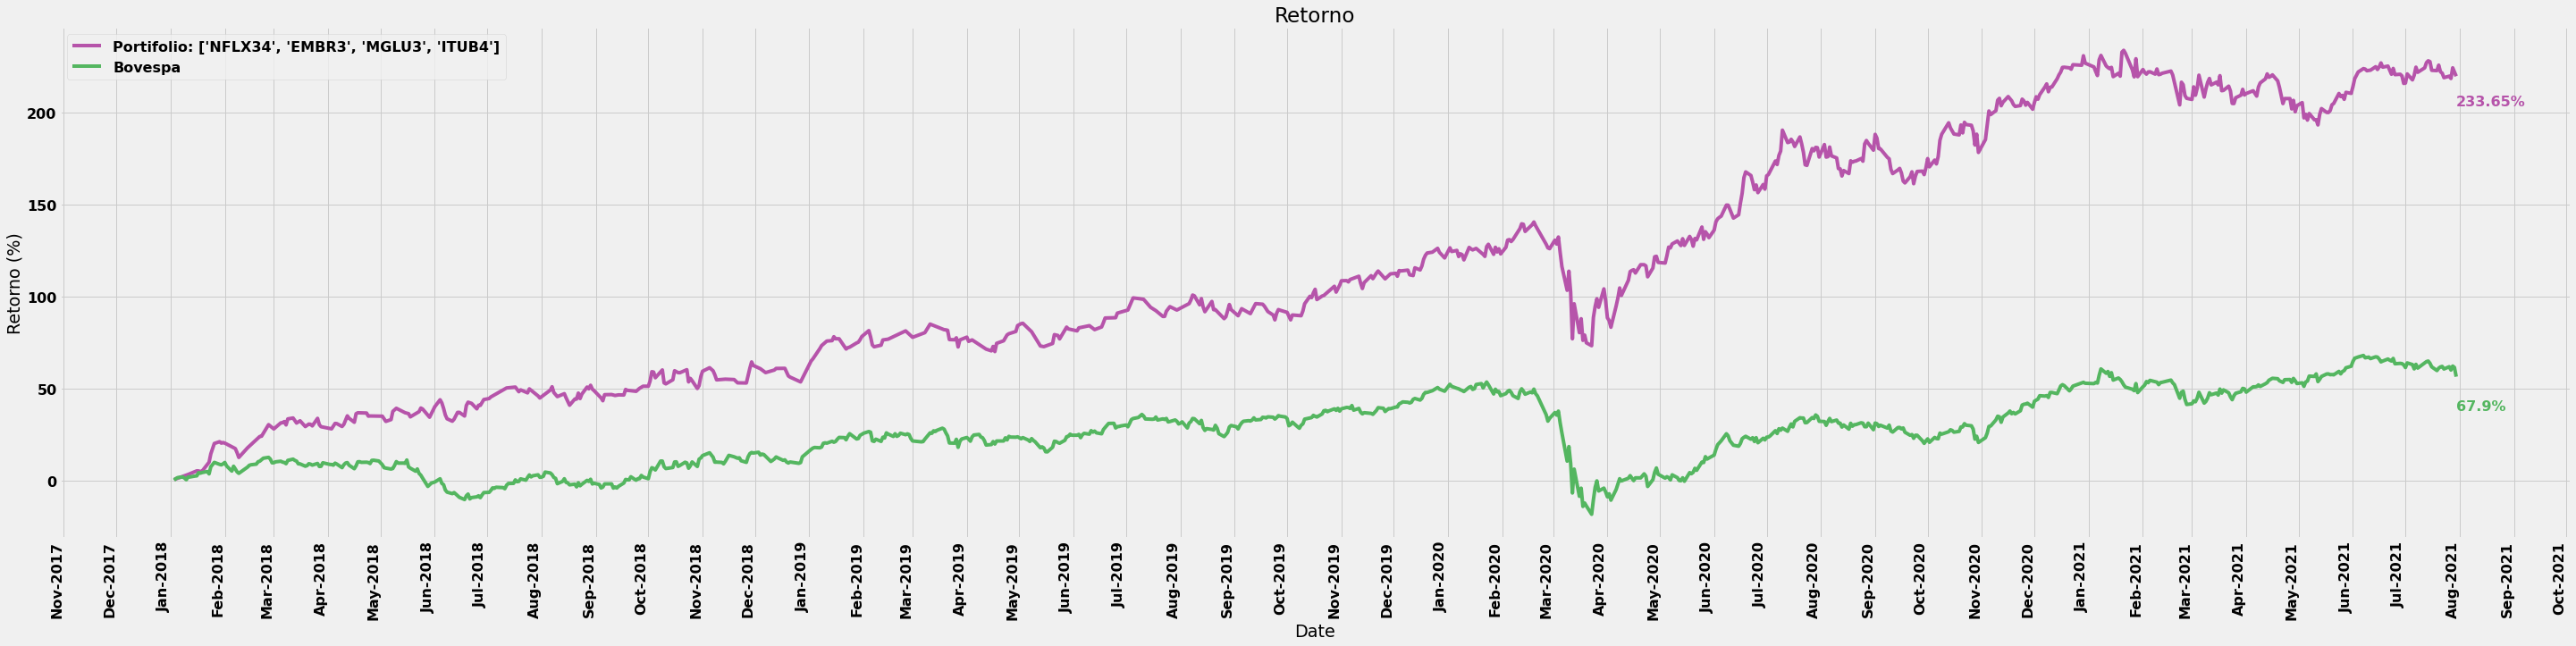

In [58]:
g = (df_portfolio['retorno_simples_cum']*100).plot(label='Portifolio: '+str(atvs), color='#b654aa')
p = (benchmark * 100).plot(label= 'Bovespa', color='#54b660')

p = g.text(x=df_portfolio.index.max(), 
           y=df_portfolio['retorno_simples_cum'].max()*100-30, 
           s=str(round(df_portfolio['retorno_simples_cum'].max()*100, 2))+'%', color='#b654aa')

p = g.text(x=benchmark.index.max(), 
           y=benchmark.max()*100-30, 
           s=str(round(benchmark.max()*100, 2))+'%', color='#54b660')

g.xaxis.set_major_locator(mpl.dates.MonthLocator())
g.xaxis.set_major_formatter(mpl.dates.DateFormatter('\n%b-%Y'))
plt.xticks(rotation=90)
plt.tight_layout()

p = g.set_title('Retorno')
p = g.set_ylabel('Retorno (%)')
p = g.legend()
#p = g.grid()

Quanto ao Ibovespa, interessante ver que de certa forma os indicies representam bem o comportamento do mercado brasileiro.

## Risco

Para calcular um **risco** de um portfolio precisamos levar em conta as correlações entre todos os ativos. Para isso calcularemos a matriz de covariaças $C$ (```pandas.cov()``` ou ```np.cov()```).

A equação do risco de uma portfólio é dada pela seguinte fórmula: $\sigma = \sqrt{\vec{w}C\vec{w}^\mathsf{T}}$, sendo $T$ a tranposição de um array 

- 3.3) Calcule o risco de 3 portfólios (varie o vetor de pesos).

In [59]:
# ajustar pra anual

In [60]:
log_ret = np.log(df_portfolio[atvs]/df_portfolio[atvs].shift(1))
vol = np.sqrt(np.dot(np.array(pesos).T, np.dot(log_ret.cov()*63, pesos)))
vol = round(vol*100, 2)

print(f'Com os pesos: {atv_peso} a valatilidade é de {vol}%')

Com os pesos: {'NFLX34': 0.3076869116096527, 'EMBR3': 0.0169207445868101, 'MGLU3': 0.2068423531292043, 'ITUB4': 0.4685499906743328} a valatilidade é de 14.94%


In [61]:
pesos_ = np.random.uniform(0, 1, len(atvs))

# normaliza para soma dar 1
soma = pesos_.sum()
pesos_ = [p / soma for p in pesos_]

atv_peso_ = dict(zip(atvs, pesos_))
atv_peso_

log_ret = np.log(df_portfolio[atvs]/df_portfolio[atvs].shift(1))
vol = np.sqrt(np.dot(np.array(pesos_).T, np.dot(log_ret.cov()*63, pesos_)))
vol = round(vol*100, 2)

print(f'com os pesos: {atv_peso_} a valatilidade é de {vol}%')

com os pesos: {'NFLX34': 0.29404637203206097, 'EMBR3': 0.27493599310492334, 'MGLU3': 0.24125889922601396, 'ITUB4': 0.18975873563700166} a valatilidade é de 16.27%


In [62]:
pesos_ = np.random.uniform(0, 1, len(atvs))

# normaliza para soma dar 1
soma = pesos_.sum()
pesos_ = [p / soma for p in pesos_]

atv_peso_ = dict(zip(atvs, pesos_))
atv_peso_

log_ret = np.log(df_portfolio[atvs]/df_portfolio[atvs].shift(1))
vol = np.sqrt(np.dot(np.array(pesos_).T, np.dot(log_ret.cov()*63, pesos_)))
vol = round(vol*100, 2)

print(f'com os pesos: {atv_peso_} a valatilidade é de {vol}%')

com os pesos: {'NFLX34': 0.044305618674015286, 'EMBR3': 0.21308987481089145, 'MGLU3': 0.5720159420654705, 'ITUB4': 0.17058856444962286} a valatilidade é de 21.66%


In [63]:
pesos_ = [.25, .25, .25, .25]

atv_peso_ = dict(zip(atvs, pesos_))
atv_peso_

log_ret = np.log(df_portfolio[atvs]/df_portfolio[atvs].shift(1))
vol = np.sqrt(np.dot(np.array(pesos_).T, np.dot(log_ret.cov()*63, pesos_)))
vol = round(vol*100, 2)

print(f'com os pesos: {atv_peso_} a valatilidade é de {vol}%')

com os pesos: {'NFLX34': 0.25, 'EMBR3': 0.25, 'MGLU3': 0.25, 'ITUB4': 0.25} a valatilidade é de 16.27%


## Teoria Moderna de Portifolio - Markowitz 

Markowitz também conhecido como efficient frontier, é uma maneira de otimizar uma carteira de investimentos. A maneira mais simples de encontrar a melhor solução é via simulação. Portanto simula-se diversos pesos, e para cada peso é calculado seu retorno esperado e risco. 

- 3.4) Otimize a carteira e obtenha o portfolio com o melhor retorno ajustado ao risco (Sharpe Ratio)

<img src="https://miro.medium.com/max/864/1*RQrjkJQhgVLnpyo1lXbizA.png">

In [107]:
def calc_markowitz(df:pd.DataFrame, simulacoes=100000):
    """
    Implementacao do Markowitz para otimizacao da carteira de investimentos
    
    @inputs:
        - df (pd.DataFrame): Tabela com os dados de fechamento dos ativos do portifolio
        - simulacoes (int): Numero de simulacoes a serem realizadas, default = 100000
    """
    peso, risco, retorno, sharpe = [], [], [], []
    
    ret = df.pct_change()
    ret = ret.mean() * 252
        
    for s in range(simulacoes):
        # pesos
        pesos = np.random.uniform(0, 10, len(atvs))
        soma = pesos.sum()
        pesos = [p / soma for p in pesos]

        #retorno
        ret_peso = np.dot(ret, pesos)

        # risco
        log_ret = np.log(df/df.shift(1))
        vol = np.sqrt(np.dot(np.array(pesos).T, np.dot(log_ret.cov(), pesos))) * np.sqrt(252)
        
        # shape
        shapeR = (ret_peso - 0)/vol
        
        peso.append(pesos)
        risco.append(vol)
        retorno.append(ret_peso)
        sharpe.append(shapeR)
        
    data = {'pesos':peso,
            'risco':risco,
            'retorno':retorno,
            'sharpe_ratio':sharpe}
    
    return pd.DataFrame(data)

In [65]:
portf_mark = calc_markowitz(df_portfolio[atvs])

In [66]:
print('Melhor distribuição dos pesos: ')

dict(
     zip(
         atvs,
         portf_mark[portf_mark['sharpe_ratio'] == portf_mark['sharpe_ratio'].max()]['pesos'].iloc[0]
     )
)

Melhor distribuição dos pesos: 


{'NFLX34': 0.4891489666448118,
 'EMBR3': 0.0033748367068372137,
 'MGLU3': 0.505978667678625,
 'ITUB4': 0.001497528969726149}

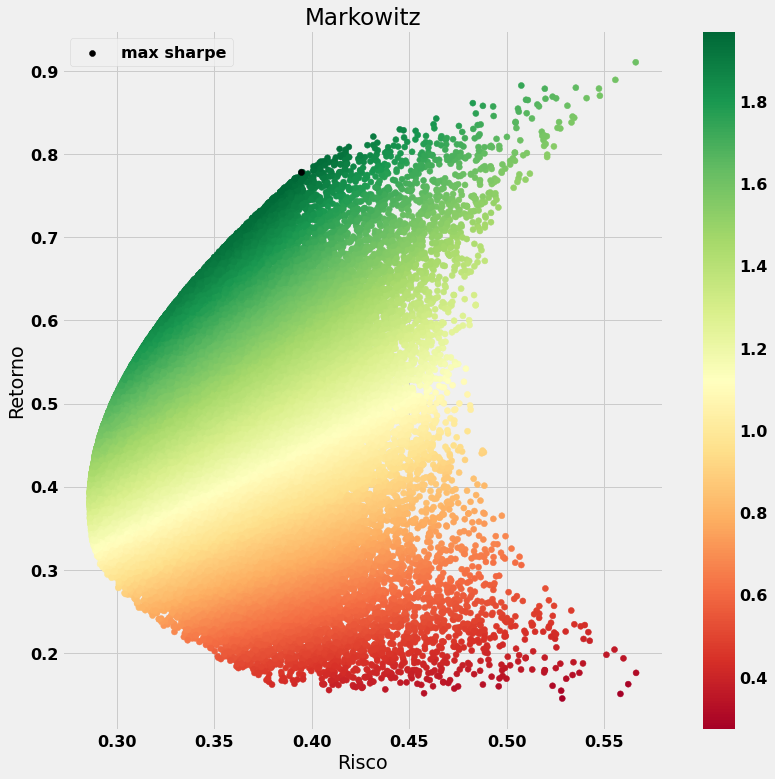

In [67]:
plt.figure(figsize=(12, 12))
#p = plt.grid()

g = \
plt.scatter(x=portf_mark['risco'],
            y=portf_mark['retorno'],
            c=portf_mark['sharpe_ratio'],
            cmap='RdYlGn')

plt.scatter(x=portf_mark[portf_mark['sharpe_ratio'] == portf_mark['sharpe_ratio'].max()]['risco'].iloc[0],
            y=portf_mark[portf_mark['sharpe_ratio'] == portf_mark['sharpe_ratio'].max()]['retorno'].iloc[0],
            color='#000000', label='max sharpe')

p = plt.colorbar(g)

p = plt.ylabel('Retorno')
p = plt.xlabel('Risco')
p = plt.title('Markowitz')
p = plt.legend()

O balanceamento de posos ideal teria um retorno de aprox. 80% assumindo um risco de aprox. 40%

## Backtesting

Estratégia de investimento: Rebalanceamento mensal de uma carteira de investimentos.

- 3.5.1) Maneira simplificada: Calcular retornos mensais ao longo do tempo. Obtenha os pesos otimizado para o mês e calcule o rendimento do proxímo mês.
- 3.5.2) Maneira completa: Realize o rebalanceamento mensal e calcule os retornos diários. Fique atento que ao longo do mês os pesos do ativos variam.
- 3.6) Faça uma análise quantitativa e qualitativa da performace do backtesting.

<AxesSubplot:xlabel='Date'>

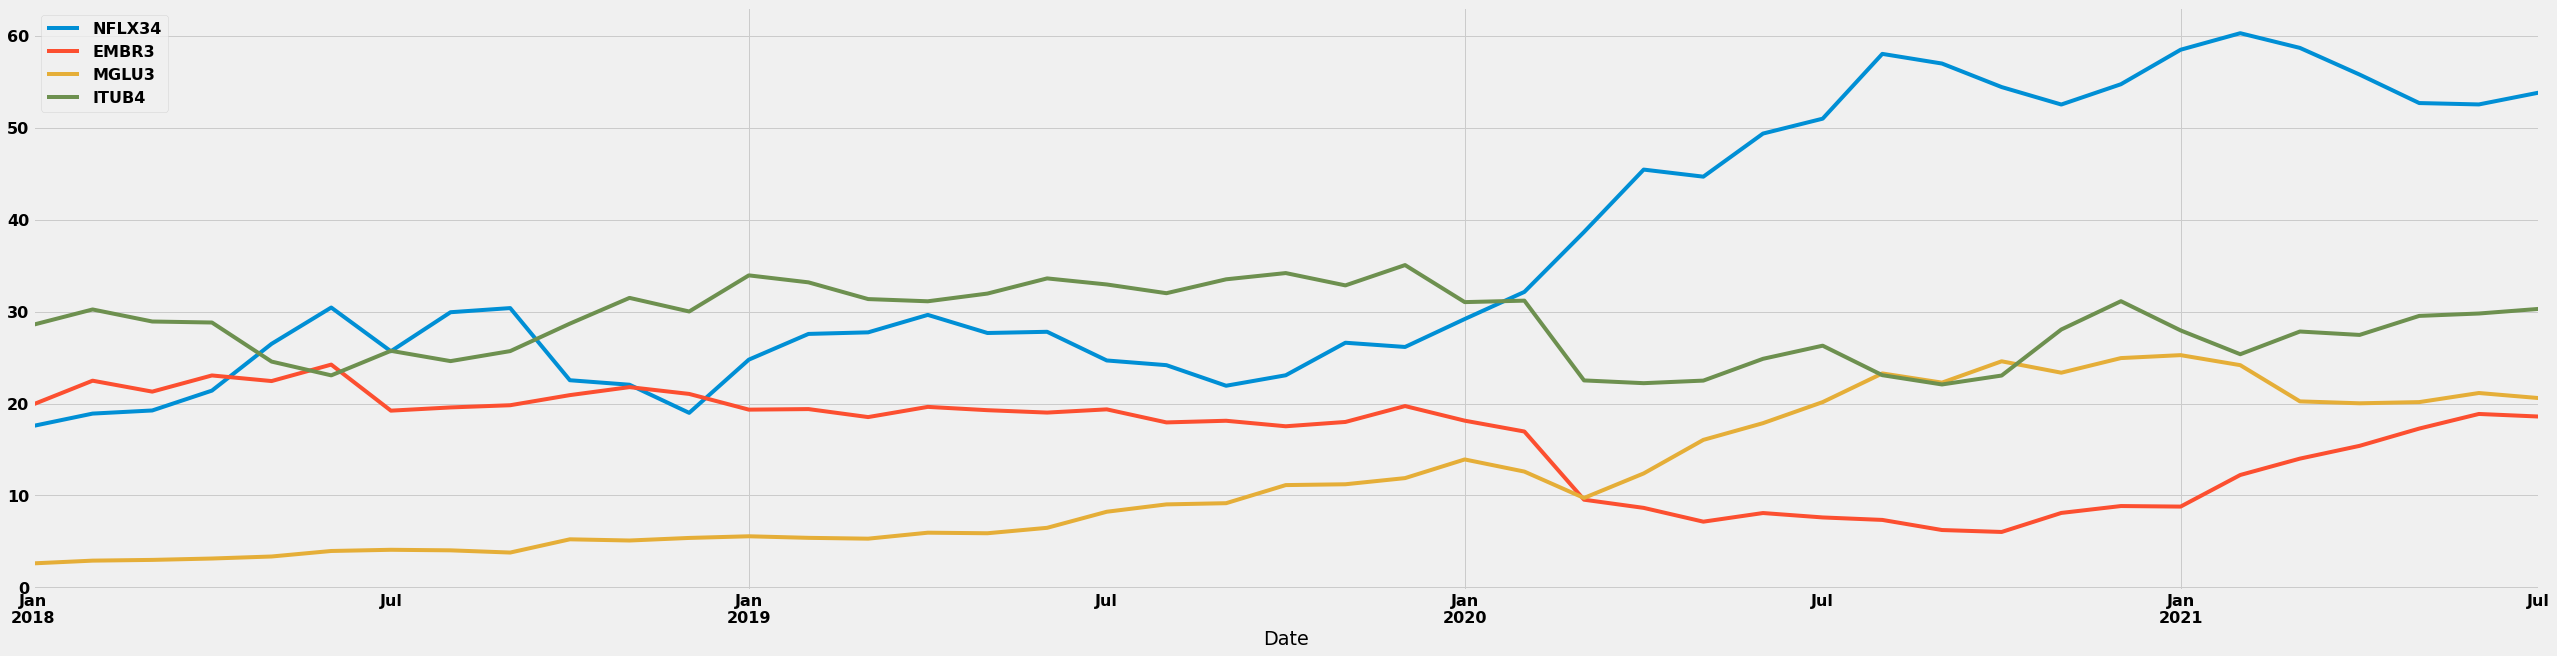

In [105]:
df_bt = df_portfolio.resample('M').pad()[atvs]
df_bt.plot()

In [106]:
df_bt

,NFLX34,EMBR3,MGLU3,ITUB4
Date,,,,
2018-01-31,17.56,19.90,2.61,28.57
2018-02-28,18.91,22.49,2.91,30.24
2018-03-31,19.25,21.30,2.99,28.93
2018-04-30,21.41,23.06,3.14,28.82
2018-05-31,26.50,22.45,3.36,24.57
2018-06-30,30.45,24.24,3.96,23.07
2018-07-31,25.69,19.23,4.09,25.74
2018-08-31,29.94,19.58,4.03,24.62
2018-09-30,30.39,19.82,3.79,25.71


# 4. Previsão de Time Series

## Cross validation em Séries Temporais

Sempre que lidamos com algoritmos de machine learning, para treiná-los temos que separar os datasets em treino e em teste. Em séries temporais não podemos separar os dados aleatoriamente, pois a ordem no tempo importa! Portanto, seguimos a seguinte separação ao longo do tempo:

<img src="https://habrastorage.org/files/f5c/7cd/b39/f5c7cdb39ccd4ba68378ca232d20d864.png"/>

## Feature Engineering em Série Temporal

Para inserir machine learning em séries temporais, precisamos efetuar o processo conhecido como feature engineering, que é básicamente construir as entradas de nosso modelo.

### Lags
Os dados mais simples que podemos inserir no nosso modelo são os valores passados.
Se deslocarmos (com a função `.shift(i)`) a série temporal em $i$ vezes, conseguimos estabelecer uma feature onde o valor atual no tempo $t$ é alinhado com um valor no tempo $t-i$. Chamamos isso de _lag_, ou atraso na série temporal. Isso é bastante útil, por exemplo, para estratégias baseadas em um valor histórico de uma feature.

### Demais features
Além dos pontos passados outras features podem ser inseridas no modelo: Volume de negociações, momentum, volatilidade, dados do mercado (ex: ibov) e etc.

- 4.1) Realize o feature engineering e teste alguns modelos de ML (Ex: Regressão linear, ARIMA, Decision Tree, Random Forest, Redes Neurais, etc...)
- 4.2) Faça um gráfico comparando os valores reais e preditos pelo modelo, durante um determinado período.
<br/>
Exemplo:
<br/>
<img width="500" height="500" src="https://miro.medium.com/max/1000/1*NvhZBDp5jNX-5Qd4LT7FEw.png">

In [393]:
# Modelos
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR
from sklearn import preprocessing

In [573]:
df_pred = df_stock[['Close', 'Volume']][:][:] # Cria uma copia do dataframe stock com as colunas de interesse
df_pred

,Close,Volume
Date,,
2015-01-13,2.44,35000
2015-01-14,2.40,35000
2015-01-20,2.55,140000
2015-01-22,3.08,175000
2015-01-23,3.23,35000
...,...,...
2021-07-26,53.54,36530
2021-07-27,53.06,36064
2021-07-28,53.37,22644


<AxesSubplot:>

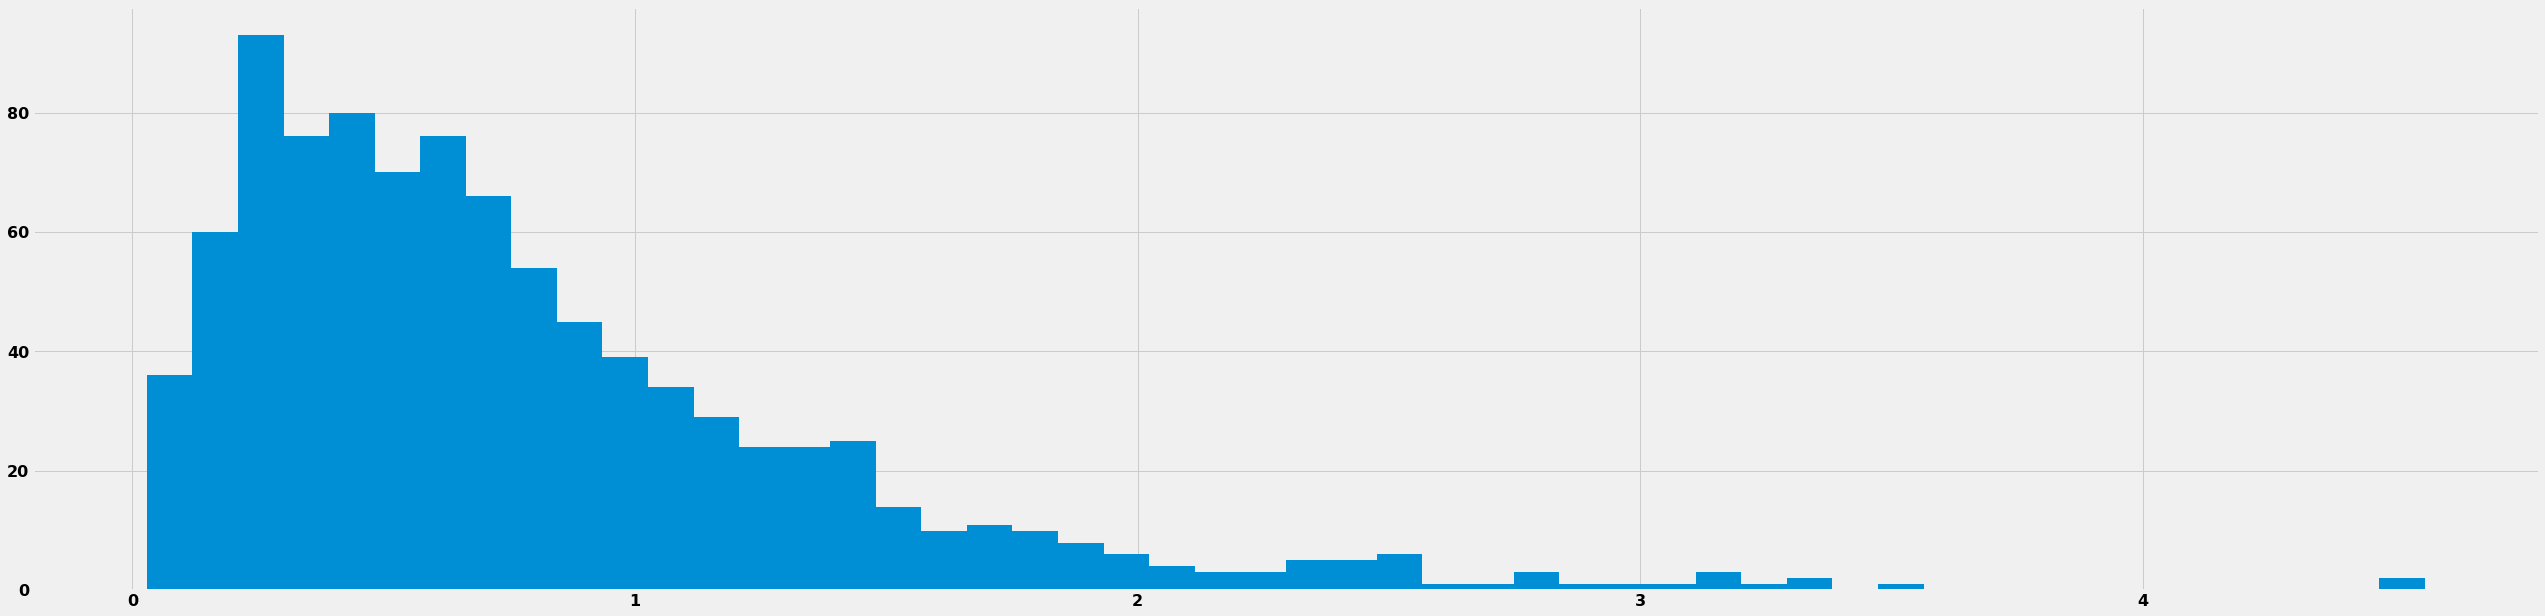

In [574]:
# Adicona o valor do risco com uma janela semanal
df_pred['Volatilidade'] = df_pred['Close'].rolling(5).std()
df_pred['Volatilidade'].hist(bins=50)

In [575]:
df_pred['Volatilidade'].head(20)

Date
2015-01-13         NaN
2015-01-14         NaN
2015-01-20         NaN
2015-01-22         NaN
2015-01-23    0.386458
2015-02-04    0.475763
2015-02-11    0.461357
2015-02-12    0.287976
2015-03-03    0.264632
2015-03-04    0.202163
2015-03-10    0.148223
2015-03-19    0.148223
2015-04-16    0.397077
2015-04-17    0.512572
2015-05-04    0.521507
2015-05-26    0.543203
2015-06-05    0.394500
2015-06-11    0.480656
2015-06-16    0.440136
2015-06-29    0.181852
Name: Volatilidade, dtype: float64

In [576]:
# adicionando os dados do ibov

ibov = \
investpy.indices.get_index_historical_data(index='Bovespa', 
                                           country='brazil', 
                                           from_date='13/01/2015', 
                                           to_date='30/07/2021')['Close']

In [577]:
len(ibov)

1619

In [578]:
#ibov.plot()

In [579]:
# Com a mesma janela de tempo o ibov possui mais dados que
# as acoes, entao por nao saber como tratar isso a principio,
# fiz um filtro apenas com datas coincidentes

df_pred = pd.concat([df_pred, ibov], axis=1, join='inner')
df_pred.columns = ['Close', 'Volume', 'Volatilidade', 'IBOV']
df_pred

,Close,Volume,Volatilidade,IBOV
Date,,,,
2015-01-13,2.44,35000,NaN,48042.0
2015-01-14,2.40,35000,NaN,47646.0
2015-01-20,2.55,140000,NaN,47877.0
2015-01-22,3.08,175000,NaN,49443.0
2015-01-23,3.23,35000,0.386458,48775.0
...,...,...,...,...
2021-07-26,53.54,36530,0.945632,126004.0
2021-07-27,53.06,36064,0.329090,124612.0
2021-07-28,53.37,22644,0.301877,126286.0


In [580]:
df_pred.describe()

,Close,Volume,Volatilidade,IBOV
count,937.000000,9.370000e+02,933.000000,937.000000
mean,31.074610,3.355080e+04,0.785789,88899.816435
std,18.307225,7.718005e+04,0.613278,23905.178892
min,2.400000,5.000000e+02,0.028810,37497.000000
25%,13.140000,5.500000e+03,0.351326,72931.000000
50%,27.360000,1.500000e+04,0.620903,93083.000000
75%,51.400000,3.500000e+04,1.039481,106751.000000
max,63.810000,1.255000e+06,4.560211,130776.000000


In [581]:
# Adicona uma coluna de predicao com lag de 30 dias
for lag in [1, 5, 10, 15, 20, 25, 30, 60, 70, 80, 100]:
    df_pred['Close_lag_'+str(lag)] = df_pred['Close'].shift(lag)
    #df_pred['Predicao'].tail(35)

In [582]:
df_pred.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 937 entries, 2015-01-13 to 2021-07-30
Data columns (total 15 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Close          937 non-null    float64
 1   Volume         937 non-null    int64  
 2   Volatilidade   933 non-null    float64
 3   IBOV           937 non-null    float64
 4   Close_lag_1    936 non-null    float64
 5   Close_lag_5    932 non-null    float64
 6   Close_lag_10   927 non-null    float64
 7   Close_lag_15   922 non-null    float64
 8   Close_lag_20   917 non-null    float64
 9   Close_lag_25   912 non-null    float64
 10  Close_lag_30   907 non-null    float64
 11  Close_lag_60   877 non-null    float64
 12  Close_lag_70   867 non-null    float64
 13  Close_lag_80   857 non-null    float64
 14  Close_lag_100  837 non-null    float64
dtypes: float64(14), int64(1)
memory usage: 117.1 KB


In [583]:
# Substituindo os valores NaN de volatilidade pela media da coluna
df_pred['Volatilidade'] = df_pred['Volatilidade'].replace(np.nan, np.mean(df_pred['Volatilidade']))

In [584]:
df_pred.columns

Index(['Close', 'Volume', 'Volatilidade', 'IBOV', 'Close_lag_1', 'Close_lag_5',
       'Close_lag_10', 'Close_lag_15', 'Close_lag_20', 'Close_lag_25',
       'Close_lag_30', 'Close_lag_60', 'Close_lag_70', 'Close_lag_80',
       'Close_lag_100'],
      dtype='object')

In [585]:
#p = df_pred.plot(kind='hist', subplots=True, bins=100)

In [586]:
df_pred.tail(20)

,Close,Volume,Volatilidade,IBOV,Close_lag_1,Close_lag_5,Close_lag_10,Close_lag_15,Close_lag_20,Close_lag_25,Close_lag_30,Close_lag_60,Close_lag_70,Close_lag_80,Close_lag_100
Date,,,,,,,,,,,,,,,
2021-07-02,53.90,75817,0.579940,127622.0,53.72,52.05,50.93,50.13,50.63,52.91,52.97,61.70,59.12,58.95,59.64
2021-07-05,53.69,9973,0.573385,126920.0,53.90,52.85,50.49,50.99,49.80,52.58,53.30,61.89,58.70,57.51,60.00
2021-07-06,56.57,93802,1.487861,125095.0,53.69,53.00,50.85,49.68,49.78,52.70,53.69,63.81,57.17,58.79,60.50
2021-07-07,56.16,33378,1.430968,127019.0,56.57,52.55,51.00,49.91,49.57,51.40,53.52,62.91,58.25,57.50,60.70
2021-07-08,55.95,38092,1.352453,125428.0,56.16,53.72,50.83,50.26,49.50,50.85,53.45,63.65,59.80,58.60,60.15
2021-07-12,55.60,34455,1.120817,127594.0,55.95,53.90,52.05,50.93,50.13,50.63,52.91,61.30,59.15,59.00,59.85
2021-07-13,56.09,16663,0.351326,128168.0,55.60,53.69,52.85,50.49,50.99,49.80,52.58,61.50,58.70,58.79,59.58
2021-07-14,55.88,80724,0.218014,128407.0,56.09,56.57,53.00,50.85,49.68,49.78,52.70,61.50,61.59,56.25,59.75
2021-07-15,55.41,63464,0.275735,127468.0,55.88,56.16,52.55,51.00,49.91,49.57,51.40,61.47,61.20,56.02,58.27


In [587]:
df_pred.columns

Index(['Close', 'Volume', 'Volatilidade', 'IBOV', 'Close_lag_1', 'Close_lag_5',
       'Close_lag_10', 'Close_lag_15', 'Close_lag_20', 'Close_lag_25',
       'Close_lag_30', 'Close_lag_60', 'Close_lag_70', 'Close_lag_80',
       'Close_lag_100'],
      dtype='object')

In [589]:
df_pred

,Close,Volume,Volatilidade,IBOV,Close_lag_1,Close_lag_5,Close_lag_10,Close_lag_15,Close_lag_20,Close_lag_25,Close_lag_30,Close_lag_60,Close_lag_70,Close_lag_80,Close_lag_100
Date,,,,,,,,,,,,,,,
2015-01-13,2.44,35000,0.785789,48042.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2015-01-14,2.40,35000,0.785789,47646.0,2.44,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2015-01-20,2.55,140000,0.785789,47877.0,2.40,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2015-01-22,3.08,175000,0.785789,49443.0,2.55,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2015-01-23,3.23,35000,0.386458,48775.0,3.08,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2021-07-26,53.54,36530,0.945632,126004.0,53.75,55.65,55.60,53.90,52.05,50.93,50.13,54.16,61.30,59.15,63.15
2021-07-27,53.06,36064,0.329090,124612.0,53.54,55.62,56.09,53.69,52.85,50.49,50.99,55.80,61.50,58.70,58.46
2021-07-28,53.37,22644,0.301877,126286.0,53.06,53.20,55.88,56.57,53.00,50.85,49.68,55.25,61.50,61.59,57.51


In [603]:
len(df_pred.dropna())

837

In [600]:
X = np.array(df_pred.dropna()[['Close_lag_1', 'Close_lag_5', 'Close_lag_10', 'Close_lag_15', 'Close_lag_20',
                               'Close_lag_25', 'Close_lag_30', 'Close_lag_60', 'Close_lag_70',
                               'Close_lag_80', 'Close_lag_100', 'IBOV', 'Volatilidade', 'Volume']])
X = np.log1p(X)
X

array([[ 2.03208785,  2.1517622 ,  2.14358936, ..., 10.90251889,
         0.41390175,  8.51739317],
       [ 1.99333884,  2.16332303,  2.13416644, ..., 10.88861381,
         0.1681944 ,  9.61587214],
       [ 2.00687085,  2.04640169,  2.14124194, ..., 10.86959649,
         0.15986236, 10.1266711 ],
       ...,
       [ 3.99009454,  3.99268091,  4.04094379, ..., 11.74631237,
         0.26380742, 10.02769436],
       [ 3.99581253,  4.00369019,  4.03264645, ..., 11.74146245,
         0.4605871 , 10.30551342],
       [ 3.9749978 ,  4.00277737,  4.00787849, ..., 11.71015205,
         0.47298212, 10.70112987]])

In [604]:
y = np.array(df_pred.dropna()['Close'])
y

array([ 6.34,  6.44,  6.39,  6.4 ,  6.14,  6.23,  6.42,  6.5 ,  7.02,
        7.15,  7.05,  6.62,  6.19,  5.81,  6.01,  6.48,  6.32,  6.31,
        6.31,  5.58,  5.71,  5.65,  5.63,  5.75,  5.97,  6.15,  5.97,
        6.11,  6.04,  6.  ,  6.13,  6.15,  6.2 ,  6.13,  6.28,  6.29,
        6.24,  6.29,  6.32,  6.52,  6.44,  6.12,  6.26,  6.41,  6.61,
        6.83,  6.47,  6.37,  7.54,  7.72,  7.95,  8.06,  7.98,  7.79,
        7.78,  7.91,  7.95,  7.92,  7.95,  8.12,  8.22,  8.37,  8.33,
        8.86,  8.73,  8.74,  8.98,  8.7 ,  8.75,  8.79,  8.78,  8.84,
        8.83,  8.9 ,  9.28,  9.05,  8.75,  9.04,  9.62,  9.76,  9.86,
       10.41, 10.71, 10.81, 10.85, 10.2 , 10.19, 10.33, 10.06,  9.7 ,
        9.69,  9.92, 10.  , 10.27, 11.62, 11.63, 11.51, 11.75, 11.6 ,
       10.92, 10.72, 10.51, 10.4 , 10.97, 11.07, 11.25, 11.49, 11.89,
       11.24, 11.37, 11.62, 11.46, 11.2 , 12.19, 12.41, 12.41, 12.69,
       13.1 , 12.95, 12.86, 12.61, 12.29, 12.38, 12.19, 12.03, 12.24,
       12.44, 12.59,

In [605]:
X.shape, y.shape

((837, 14), (837,))

In [606]:
len_treino = int(np.ceil( len(df_stock) * .8 )) # 80% do dataset para treino e 20% para teste
len_treino

750

In [607]:
X_train = X[:len_treino]
y_train = y[:len_treino]

X_test = X[len_treino:]
y_test = y[len_treino:]

In [608]:
X_train.shape, y_train.shape, X_test.shape, y_test.shape

((750, 14), (750,), (87, 14), (87,))

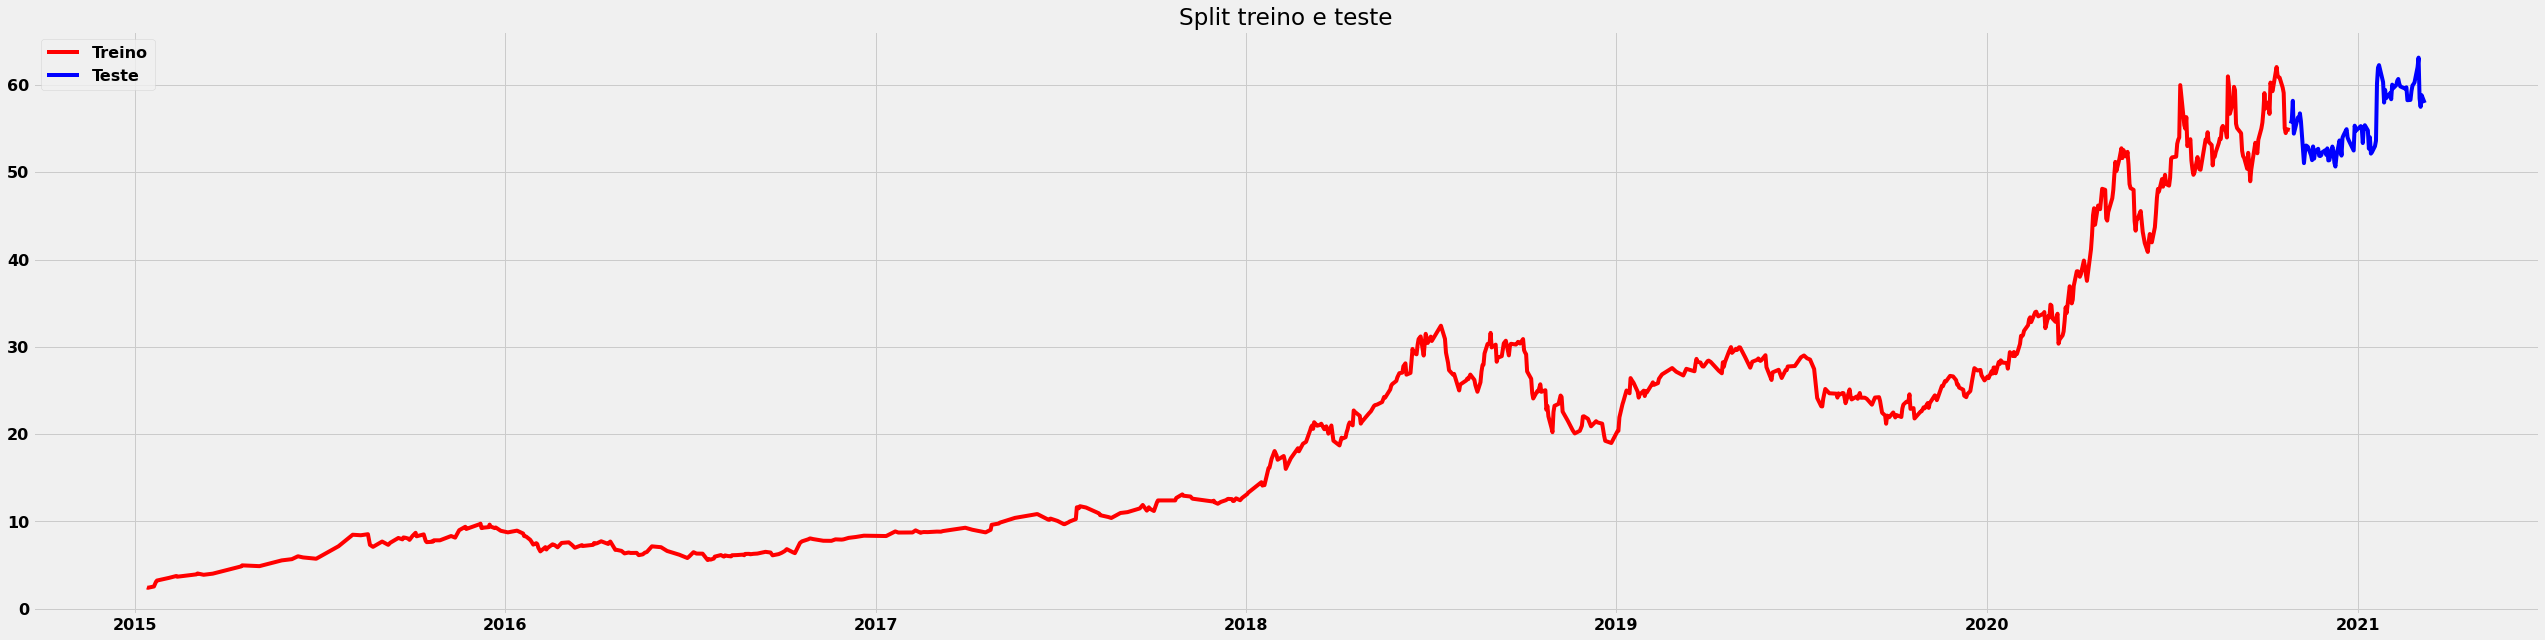

In [609]:
plt.plot(df_pred['Close'][:-lag][:len_treino], c='r', label='Treino')
plt.plot(df_pred['Close'][:-lag][len_treino:], c='b', label='Teste')
p = plt.legend()
p = plt.title('Split treino e teste')

In [610]:
# SVM
modeloSVM = SVR(kernel='rbf', gamma=.01, C=1e3)
modeloSVM.fit(X_train, y_train)

SVR(C=1000.0, gamma=0.01)

In [611]:
confSVM = modeloSVM.score(X_test, y_test)
print(f'Desempenho do modelo SVM (O ideal é 1.0): {confSVM}')

Desempenho do modelo SVM (O ideal é 1.0): 0.8602555031890795


In [612]:
predictSVM = modeloSVM.predict(X_test)

In [613]:
# Regressao Linear
modeloRegLin = LinearRegression()
modeloRegLin.fit(X_train, y_train)

LinearRegression()

In [614]:
confRegLin = modeloRegLin.score(X_test, y_test)
print(f'Desempenho do modelo Regressao Linear (O ideal é 1.0): {confRegLin}')

Desempenho do modelo Regressao Linear (O ideal é 1.0): -0.8426224856661715


In [615]:
predictRegLin = modeloRegLin.predict(X_test)

In [616]:
# Floresta Aleatoria
modeloRf = RandomForestRegressor(n_estimators=200)
modeloRf.fit(X_train, y_train)

RandomForestRegressor(n_estimators=200)

In [617]:
confRf = modeloRf.score(X_test, y_test)
print(f'Desempenho do modelo Florestas Aleatorias (O ideal é 1.0): {confRf}')

Desempenho do modelo Florestas Aleatorias (O ideal é 1.0): 0.8526354049209467


In [618]:
predictRf = modeloRf.predict(X_test)

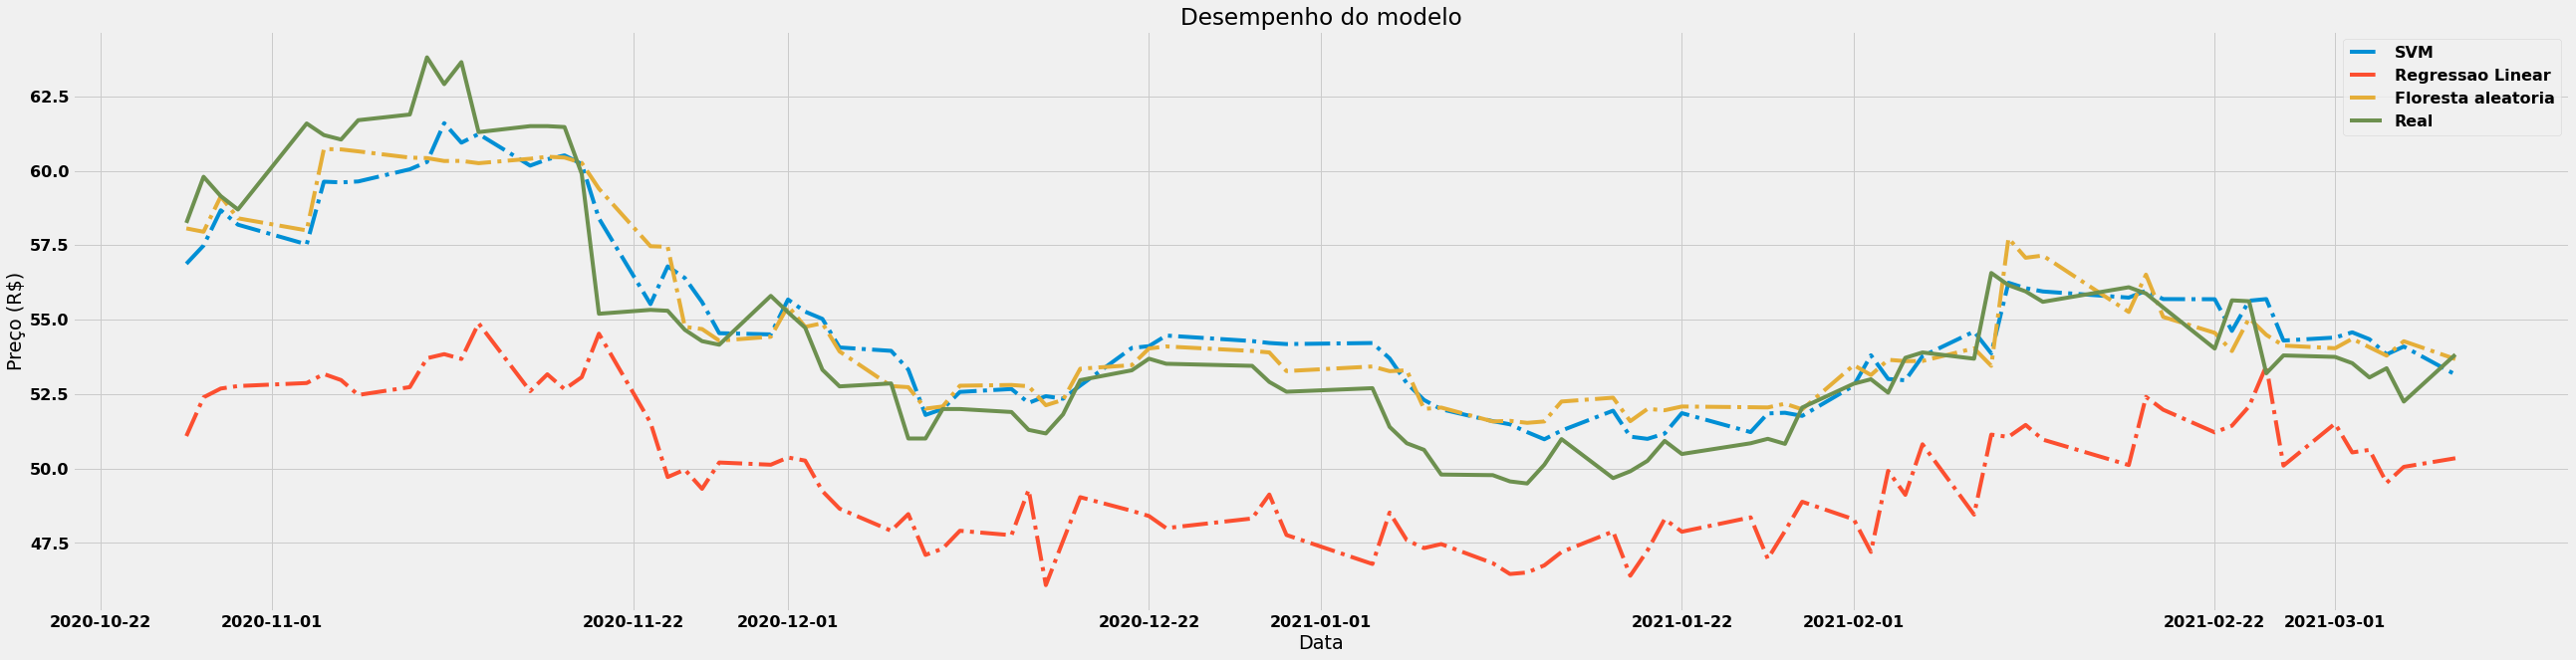

In [619]:
eixo_x = np.array(df_pred.index[:-lag][len_treino:])
plt.plot(eixo_x, predictSVM, label='SVM', linestyle='-.')
plt.plot(eixo_x, predictRegLin, label='Regressao Linear', linestyle='-.')
plt.plot(eixo_x, predictRf, label='Floresta aleatoria', linestyle='-.')
plt.plot(eixo_x, y_test, label='Real')
plt.legend()
plt.title('Desempenho do modelo')
plt.xlabel('Data')
p = plt.ylabel('Preço (R$)')

Os modelos obtiveram desempenho regular eu diria, sendo que o com melhor desempenho foi SVM, nao sei ainda se dada aplicao esse é valor de precisao aceitavel, snedo que alguns exemplos que eu havia encontrado, tiveram preciso maior. Mas levando em conta que eu nao fiz muito pre-processamento nos dados, apenas apliquei log para atenuar os valores, acredito que esta dentro do aceitavel.

## LSTM

E por fim te desafiamos a implementar uma arquitetura de redes neurais para dados sequências: LSTM. Podem tomar como referência esse notebook, podem copiar o código, o intuito dessa etapa é que vocês tenham um contato com Deep Learning. (https://drive.google.com/file/d/1uagMXYRMJTdMJwoQbQD5LVfrYj4aUuSF/view?usp=sharing)

In [303]:
#!pip install keras

In [304]:
#!pip install tensorflow

In [389]:
from keras.models import Sequential
from keras.layers import Dense, LSTM, Dropout, GRU, Bidirectional
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error as rmse

In [427]:
len_treino = int(np.ceil(len(df_pred) * .7)) # 70% do dataset para treino e 30% para teste
len_treino

656

In [428]:
df_pred.iloc[:len_treino]['Close'].tail()

Date
2020-06-04    42.51
2020-06-05    41.90
2020-06-08    40.88
2020-06-09    42.17
2020-06-10    42.94
Name: Close, dtype: float64

In [429]:
df_pred.iloc[len_treino:]['Close'].head()

Date
2020-06-12    41.98
2020-06-15    43.72
2020-06-16    45.26
2020-06-17    47.07
2020-06-18    48.10
Name: Close, dtype: float64

In [430]:
treino = df_pred.filter(['Close']).iloc[:len_treino]
teste = df_pred.filter(['Close']).iloc[len_treino:]

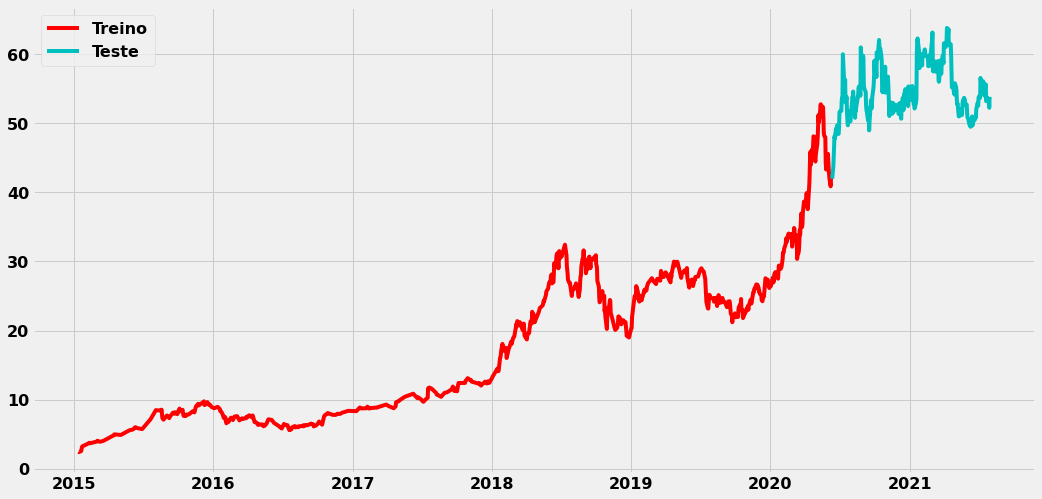

In [431]:
plt.figure(figsize=(16,8))
plt.plot(treino, c='r', label='Treino')
plt.plot(teste, c = 'c', label='Teste')
p = plt.legend()

In [432]:
treino, teste = treino.values, teste.values

In [433]:
sc = MinMaxScaler(feature_range=(0, 1))
treino_scale = sc.fit_transform(treino)
treino_scale

array([[7.94281176e-04],
       [0.00000000e+00],
       [2.97855441e-03],
       [1.35027800e-02],
       [1.64813344e-02],
       [2.26370135e-02],
       [2.68069897e-02],
       [2.52184273e-02],
       [3.05798253e-02],
       [3.25655282e-02],
       [2.95869738e-02],
       [3.21683876e-02],
       [4.86497220e-02],
       [5.10325655e-02],
       [4.92454329e-02],
       [6.23510723e-02],
       [6.51310564e-02],
       [7.16838761e-02],
       [6.91024623e-02],
       [6.61239079e-02],
       [9.31294678e-02],
       [9.45194599e-02],
       [1.20730739e-01],
       [1.19539317e-01],
       [1.21922160e-01],
       [9.76965846e-02],
       [9.31294678e-02],
       [1.05242256e-01],
       [9.76965846e-02],
       [1.02462272e-01],
       [1.13383638e-01],
       [1.11199365e-01],
       [1.10206513e-01],
       [1.14575060e-01],
       [1.13780778e-01],
       [1.11795075e-01],
       [1.09015091e-01],
       [1.18149325e-01],
       [1.25099285e-01],
       [1.17156473e-01],


In [434]:
X_train, y_train = [], []

for i in range(60, len(treino_scale)):
    X_train.append(treino_scale[i-60:i,0])
    y_train.append(treino_scale[i,0])

In [435]:
X_train = np.reshape(np.array(X_train), (np.array(X_train).shape[0], 
                                         np.array(X_train).shape[1],
                                         1))
y_train = np.array(y_train)

In [436]:
X_train.shape, y_train.shape

((596, 60, 1), (596,))

In [437]:
modelo = Sequential()

modelo.add(LSTM(50, 
                return_sequences=True, 
                input_shape=(X_train.shape[1], 1)))

modelo.add(LSTM(50, return_sequences=False))
modelo.add(Dense(25))
modelo.add(Dense(1))

In [438]:
# https://keras.io/api/optimizers/
modelo.compile(optimizer='rmsprop', loss='mean_squared_error')

In [439]:
modelo.fit(X_train, y_train, epochs=15)

Epoch 1/15
19/19 [==============================] - 6s 94ms/step - loss: 0.0206
Epoch 2/15
19/19 [==============================] - 2s 94ms/step - loss: 0.0043
Epoch 3/15
19/19 [==============================] - 2s 96ms/step - loss: 0.0041
Epoch 4/15
19/19 [==============================] - 2s 95ms/step - loss: 0.0040
Epoch 5/15
19/19 [==============================] - 2s 99ms/step - loss: 0.0027
Epoch 6/15
19/19 [==============================] - 2s 115ms/step - loss: 0.0032
Epoch 7/15
19/19 [==============================] - 2s 109ms/step - loss: 0.0027
Epoch 8/15
19/19 [==============================] - 2s 113ms/step - loss: 0.0023
Epoch 9/15
19/19 [==============================] - 2s 117ms/step - loss: 0.0016
Epoch 10/15
19/19 [==============================] - 2s 116ms/step - loss: 0.0025
Epoch 11/15
19/19 [==============================] - 2s 120ms/step - loss: 0.0014
Epoch 12/15
19/19 [==============================] - 2s 112ms/step - loss: 0.0021
Epoch 13/15
19/19 [===========

In [440]:
inputs = teste
inputs = inputs.reshape(-1,1)
inputs = sc.transform(inputs)

In [441]:
X_test, y_test = [], []

for i in range(60,len(teste)):
    X_test.append(inputs[i-60:i,0])
    y_test.append(inputs[i, 0])

In [442]:
X_test = np.array(X_test)
X_test = np.reshape(X_test, (X_test.shape[0],X_test.shape[1],1))

In [443]:
ypredict = modelo.predict(X_test)
ypredict = sc.inverse_transform(ypredict)

In [444]:
len(ypredict), len(y_test)

(221, 221)

In [267]:
rmse(y_test, ypredict)

6678635399.56337

In [269]:
treino_ = df_stock.filter(['Close']).iloc[:len_treino]
teste_ = df_stock.filter(['Close']).iloc[len_treino:][:221]
teste_['predict'] = ypredict

plt.figure(figsize=(16,8))
plt.plot(treino_, c='r', label='Treino')
plt.plot(teste_['Close'], c = 'c', label='Real')
plt.plot(teste_['predict'], c = 'y', label='Predito')
p = plt.legend()

ValueError: Cannot set a frame with no defined index and a value that cannot be converted to a Series